In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [379]:
# get the dataset, we have 2, one with data on the people, and one with whether they paid their credit or not
app_rec=pd.read_csv("application_record.csv")
cred_rec=pd.read_csv("credit_record.csv")

In [381]:
app_rec.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [383]:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

We only have Null values in the Occupation_Type others don't have any. There is 134203 null values \
So we are going to replace the Nan values by "unknown", because deleting the lines that have a null value in occupation would make us lose too much lines/data

In [141]:
app_rec=app_rec.fillna("unknown")

Description of the different variables\
CODE_GENDER          What is the gender of the person\
FLAG_OWN_CAR         Does he have a car or not\
FLAG_OWN_REALTY      Does he have a property\
CNT_CHILDREN         Number of children\
AMT_INCOME_TOTAL     Annual income\
NAME_INCOME_TYPE     income category\ 
NAME_EDUCATION_TYPE  Education level\
NAME_FAMILY_STATUS   Marital status\
NAME_HOUSING_TYPE    Way of living\
DAYS_BIRTH           Birthday \
DAYS_EMPLOYED        Start date of employment (Count backwards from current day(0). If positive, it means the person currently unemployed.)  \
FLAG_MOBIL           Is there a mobile phone  \
FLAG_WORK_PHONE      Is there a work phone\
FLAG_PHONE           Is there a phone\
FLAG_EMAIL           Is there an email\
OCCUPATION_TYPE      Occupation work\
CNT_FAM_MEMBERS      Family size

In [61]:
cred_rec.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


ID Client number \
MONTHS_BALANCE Record month The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on \
STATUS Status 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [63]:
cred_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


No null values in the cred_rec dataset

In [65]:
cred_rec['ID'].nunique()

45985

So we have about 46000 unique people in the cred rec data set

In [67]:
unique_counts = pd.DataFrame.from_records([(col, app_rec[col].nunique()) for col in app_rec.columns],
                          columns=['Column_Name', 'Num_Unique'])
unique_counts

,Column_Name,Num_Unique
0,ID,438510
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
4,CNT_CHILDREN,12
5,AMT_INCOME_TOTAL,866
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5
8,NAME_FAMILY_STATUS,5
9,NAME_HOUSING_TYPE,6


We see that flag_mobil only has 1 values, it is only filled with 1 so this column gives us 0 information, we can just drop it

In [143]:
app_rec = app_rec.drop(columns=['FLAG_MOBIL'])

Now let's look at the different variables of each features (that aren't binary)



We are now going to merge the 2 data sets that we have on the ID, And we are going to consider that anyone who hasn't paid there credits in over 60 days will be consider a bad status, and so will get a 1, others will be assigned with 0



In [145]:
cred_rec["STATUS_BINARY"] = None

cred_rec.loc[cred_rec["STATUS"] == "2", "STATUS_BINARY"] = "Y"
cred_rec.loc[cred_rec["STATUS"] == "3", "STATUS_BINARY"] = "Y"
cred_rec.loc[cred_rec["STATUS"] == "4", "STATUS_BINARY"] = "Y"
cred_rec.loc[cred_rec["STATUS"] == "5", "STATUS_BINARY"] = "Y"

record_count=cred_rec.groupby('ID').count()
record_count['STATUS_BINARY'][record_count['STATUS_BINARY'] > 0]='Y' 
record_count['STATUS_BINARY'][record_count['STATUS_BINARY'] == 0]='N' 
record_count.drop(columns=["STATUS"])
record_count=record_count.drop(columns=["MONTHS_BALANCE"])
record_count["STATUS_BINARY"]=record_count["STATUS_BINARY"].map({"N":0,"Y":1})
df_merged=pd.merge(app_rec,record_count,how='inner',on='ID')
df_merged=df_merged.drop(columns=["STATUS"])

Let's look at the different variables that are in each columns for several categorical columns and the children and family members count, we don't take for exemple age because there is too much unique values and we don't need to see each one

In [73]:
print("CNT_CHILDREN")
print(app_rec['CNT_CHILDREN'].unique())
print("\n")

print("NAME_INCOME_TYPE")
print(app_rec['NAME_INCOME_TYPE'].unique())
print("\n")

print("NAME_EDUCATION_TYPE")
print(app_rec['NAME_EDUCATION_TYPE'].unique())
print("\n")

print("NAME_FAMILY_STATUS")
print(app_rec['NAME_FAMILY_STATUS'].unique())
print("\n")

print("NAME_HOUSING_TYPE")
print(app_rec['NAME_HOUSING_TYPE'].unique())
print("\n")

print("OCCUPATION_TYPE")
print(app_rec['OCCUPATION_TYPE'].unique())
print("\n")

print("CNT_FAM_MEMBERS")
print(app_rec['CNT_FAM_MEMBERS'].unique())
print("\n")


CNT_CHILDREN
[ 0  1  3  2  4  5 14 19  7  9 12  6]


NAME_INCOME_TYPE
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']


NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


NAME_FAMILY_STATUS
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']


NAME_HOUSING_TYPE
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


OCCUPATION_TYPE
['unknown' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drivers' 'Core staff' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty agents' 'IT staff']


CNT_FAM_MEMBERS
[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]




Let's make the DATES variables more understandable

In [147]:
df=df_merged.copy()
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365

df['IS_UNEMPLOYED'] = (df['DAYS_EMPLOYED'] > 0).astype(int)

df['YEARS_EMPLOYED'] = np.nan
df.loc[df['DAYS_EMPLOYED'] < 0, 'YEARS_EMPLOYED'] = -df['DAYS_EMPLOYED'] / 365
df['YEARS_EMPLOYED'] = df['YEARS_EMPLOYED'].fillna(0)

df=df.drop(columns=["DAYS_BIRTH"])
df=df.drop(columns=["DAYS_EMPLOYED"])

We are changing the column of days_birth to the age of the person, as well as a column to see whether the person is employed instead of the numbers of days they were employed. We are also adding a column of the amount of years a person has been employed instead of the number of days.

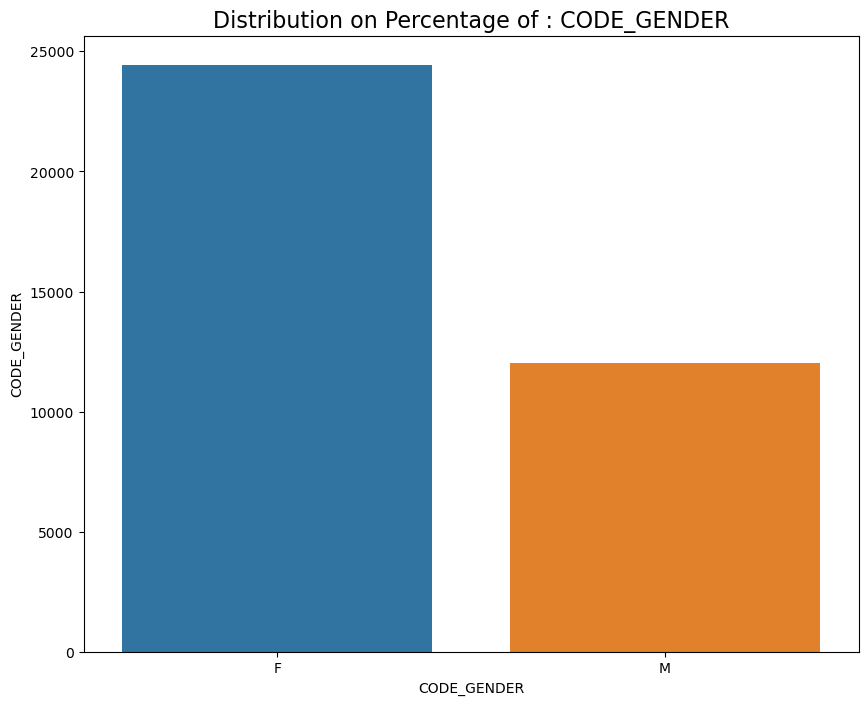

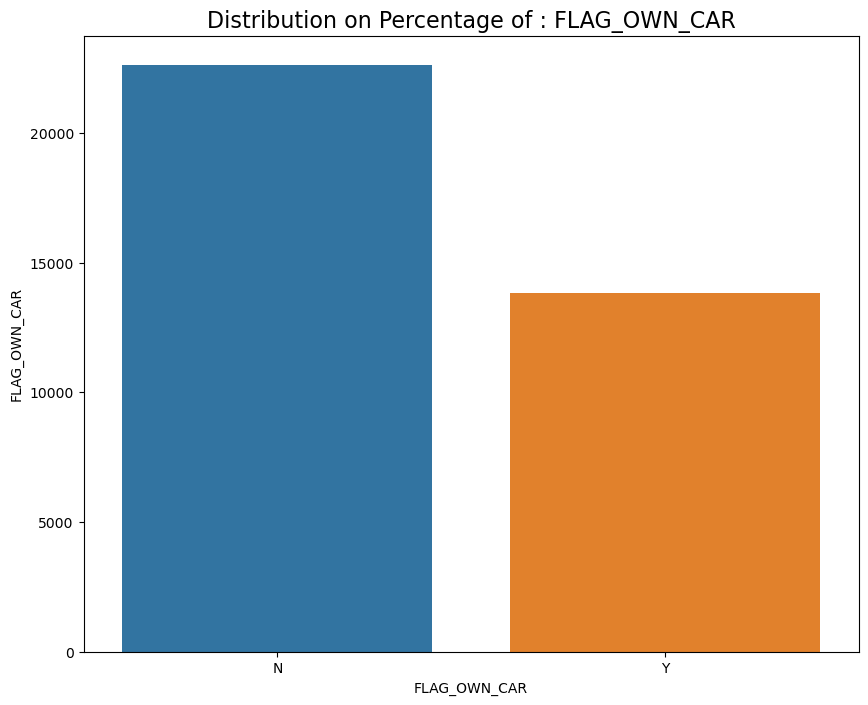

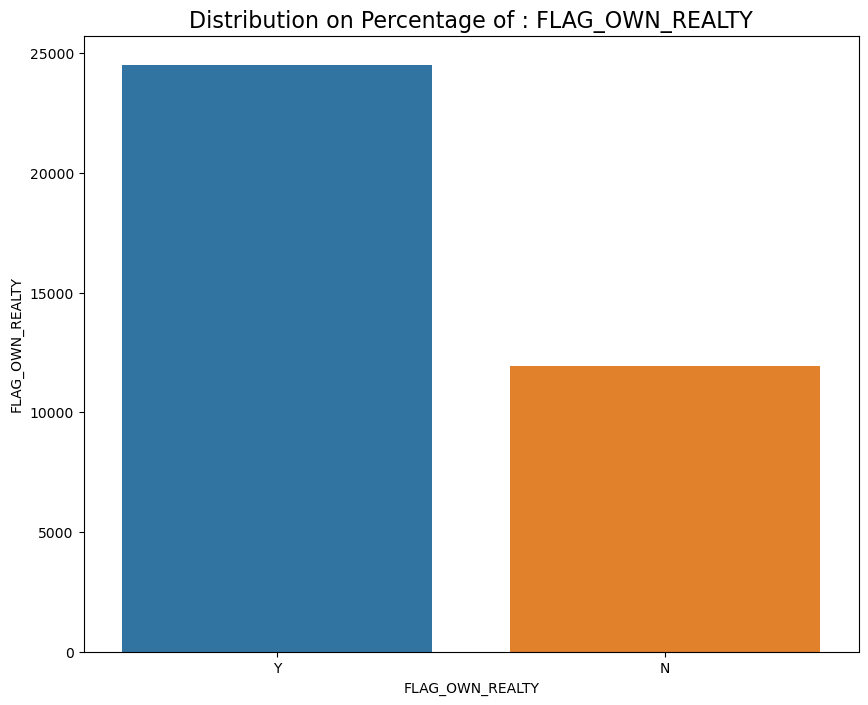

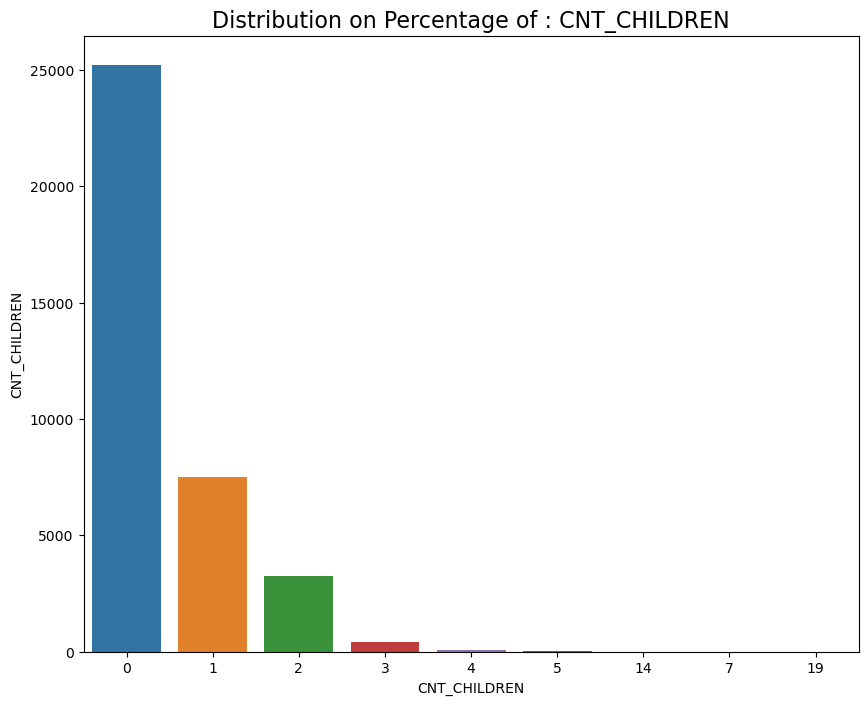

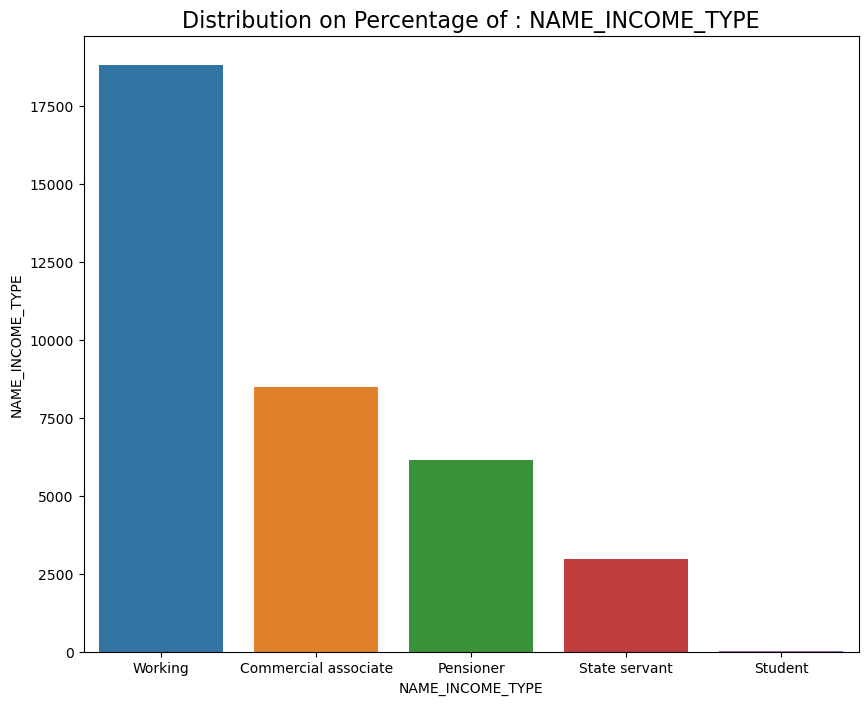

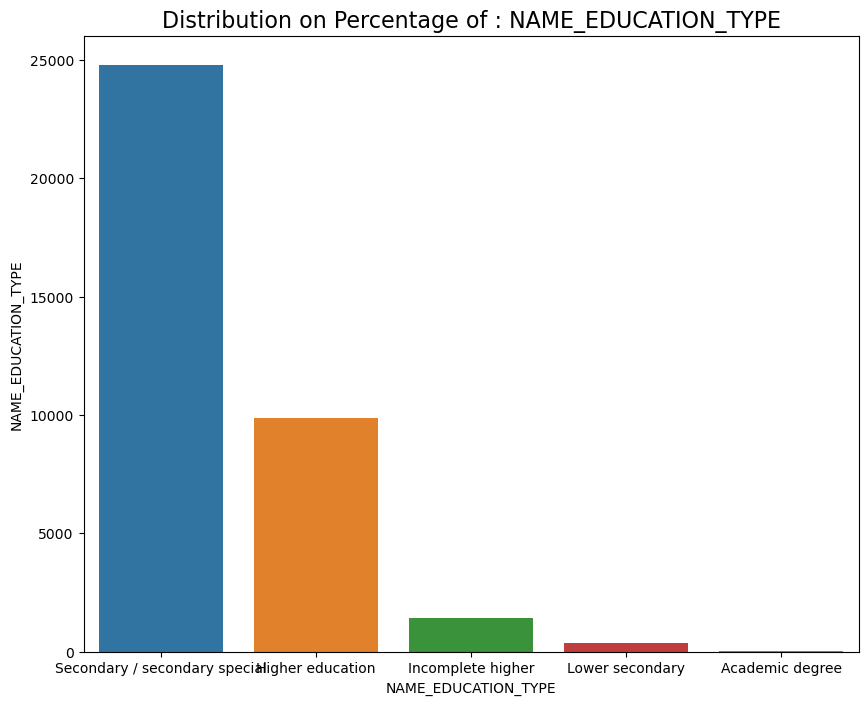

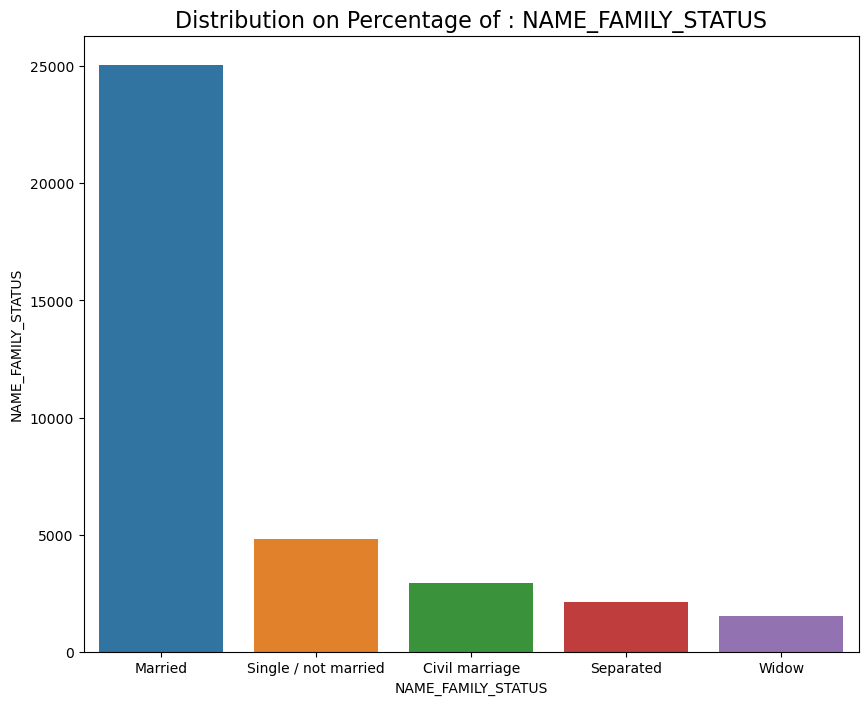

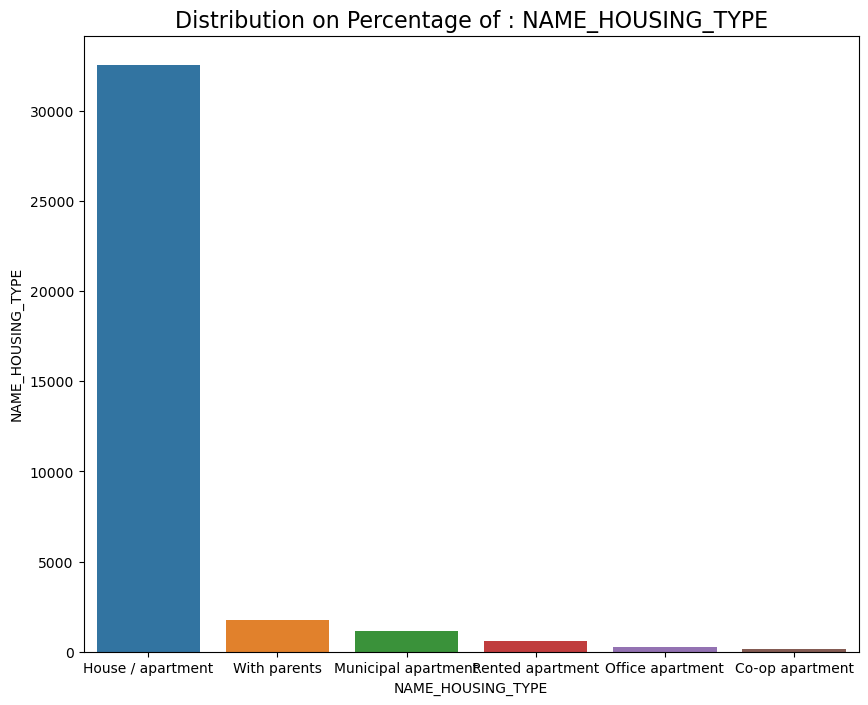

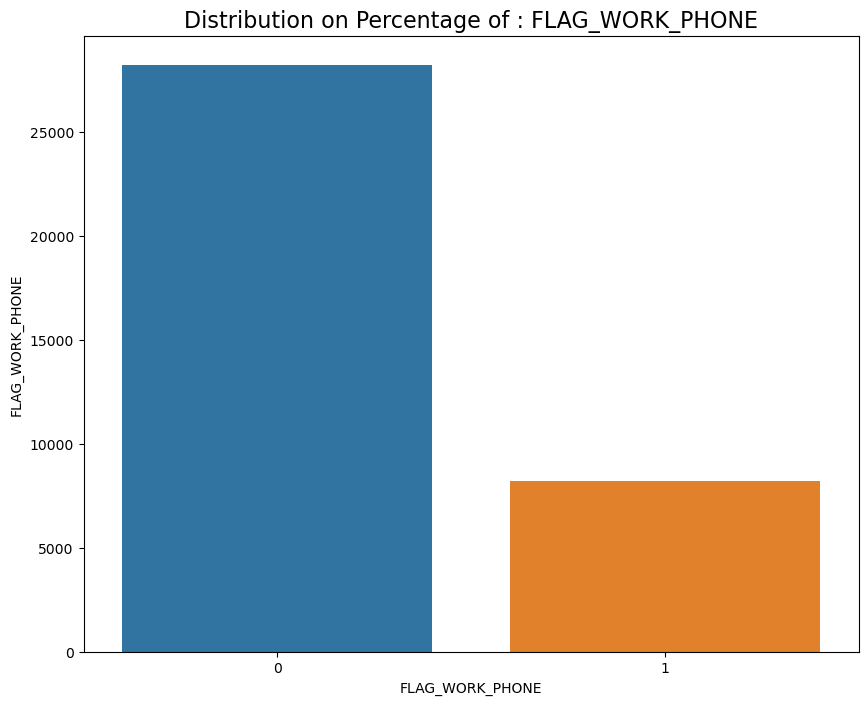

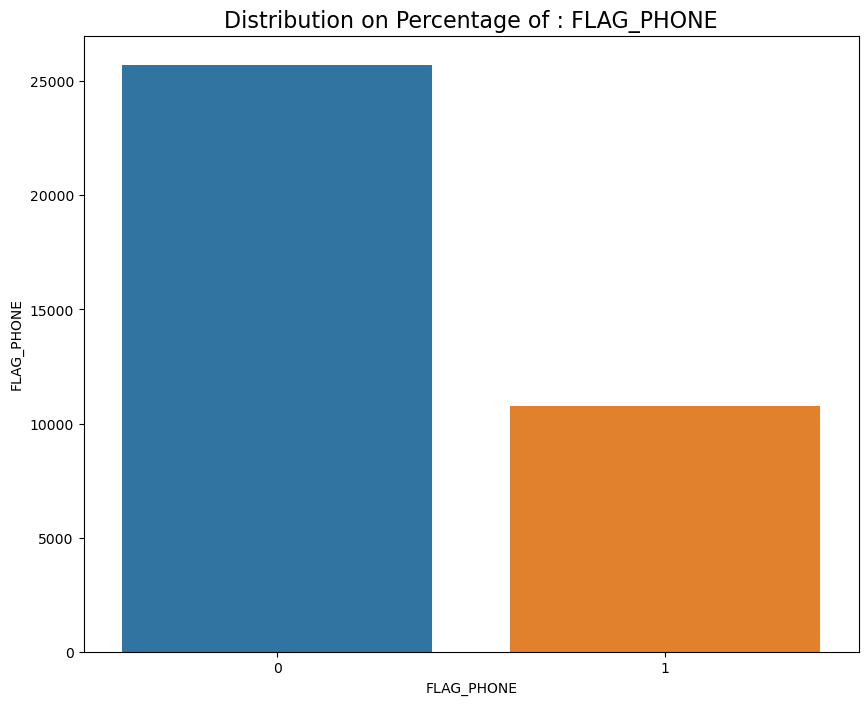

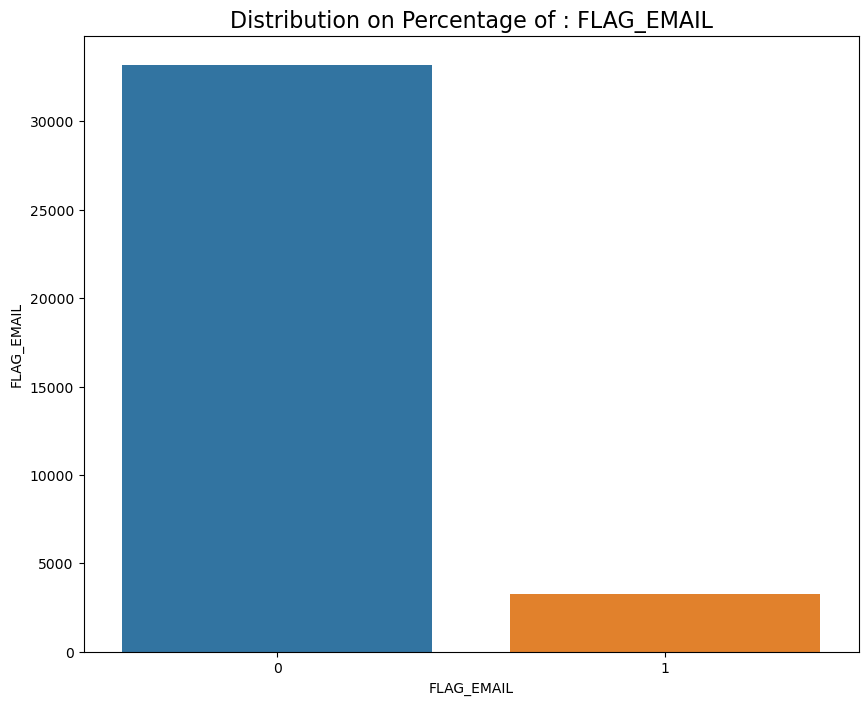

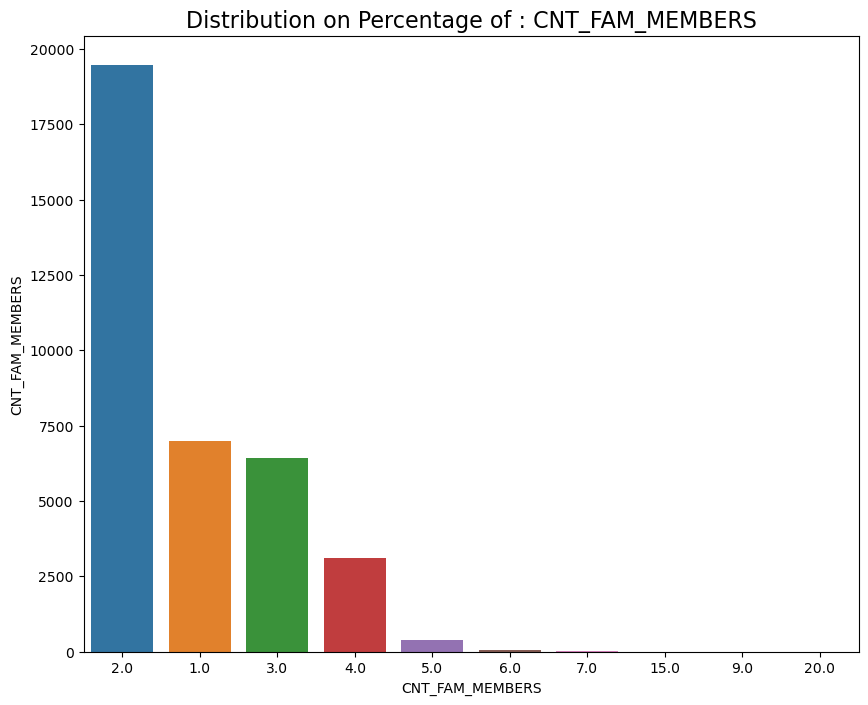

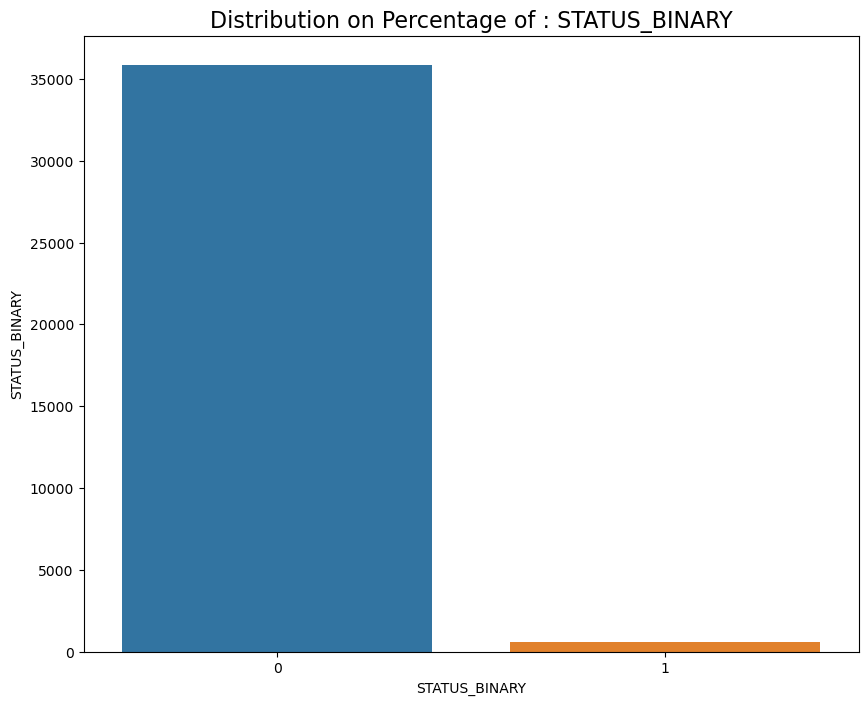

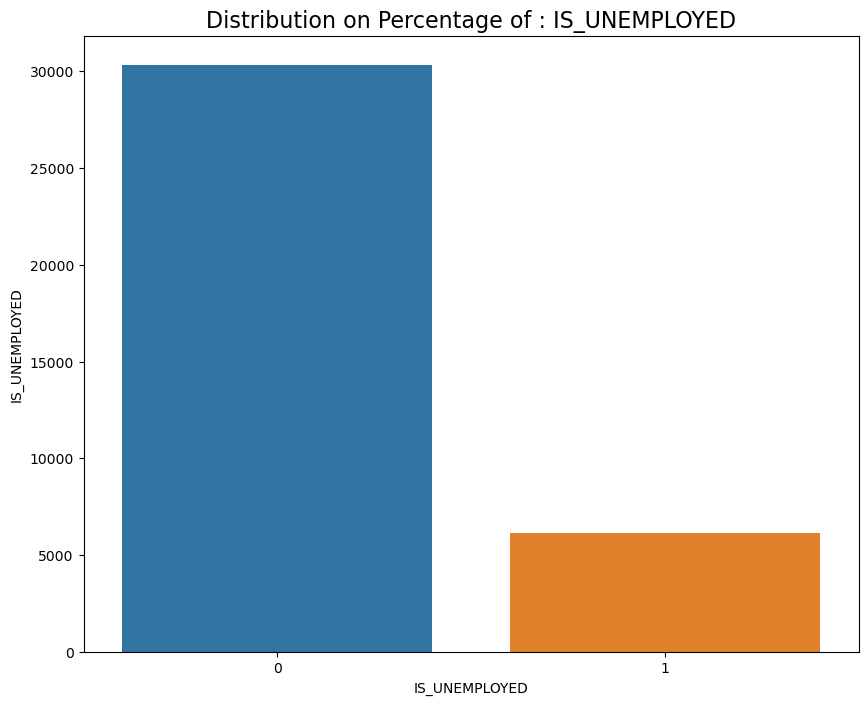

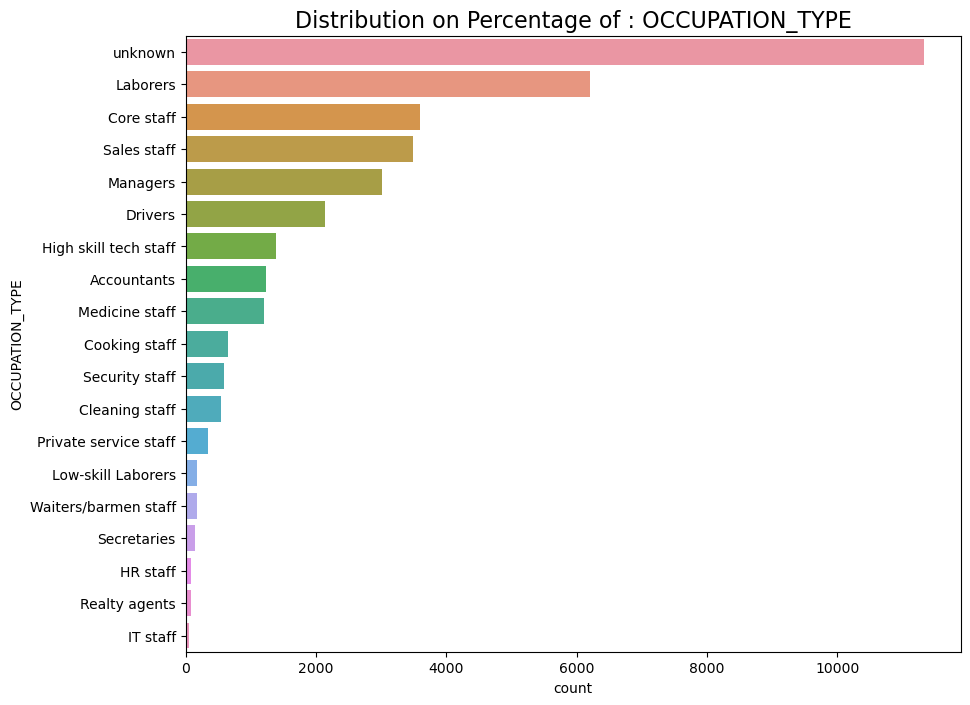

In [76]:
cols_to_exclude = ['ID', 'AGE_YEARS', 'YEARS_EMPLOYED', 'AMT_INCOME_TOTAL', 'BINARY_STATUS','OCCUPATION_TYPE']
cols_to_plot = [col for col in df.columns if col not in cols_to_exclude]
for col in cols_to_plot:
    plt.figure(figsize=(10, 8))
    
    n_unique = df[col].nunique()
   
    ax = sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.ylabel(col)

    plt.title(f'Distribution on Percentage of : {col}', fontsize=16)
    plt.show()

#doing OCCUPATION TYPE on the y column because too many values so need to make it readable
plt.figure(figsize=(10, 8))

p = sns.countplot(y='OCCUPATION_TYPE', data=df, order=df['OCCUPATION_TYPE'].value_counts().index)

total = len(df['OCCUPATION_TYPE'])
plt.ylabel('OCCUPATION_TYPE')
plt.title(f'Distribution on Percentage of : {"OCCUPATION_TYPE"}', fontsize=16)
plt.show()


The first bar chart displays the distribution of the "CODE_GENDER" variable within the dataset. It shows a significant imbalance between the genders: the number of female cases (F) is notably higher, with nearly 25,000 entries, compared to about 12,000 male cases (M). This imbalance can influence machine learning model performance and may require techniques such as resampling (e.g., SMOTE) to ensure fairer and more accurate predictions.

The second bar chart illustrates the distribution of the "FLAG_OWN_CAR" variable in the dataset. It reveals that the majority of individuals do not own a car, as indicated by the "N" category having a higher count (over 22,000), while the "Y" category (car owners) is notably lower, at around 14,000. This demonstrates an uneven split between car owners and non-owners, which may be relevant when analyzing or modeling patterns of credit card fraud

The third bar chart represents the distribution of the "FLAG_OWN_REALTY" variable in the dataset. It shows that a majority of individuals own real estate ("Y"), totaling nearly 25,000, while a much smaller group does not own real estate ("N"), with around 12,000 entries. This strong imbalance suggests that property ownership is common among the dataset population, which could be a relevant factor when modeling credit risk or analyzing fraud tendencies.

The fourth bar chart displays the distribution of the "CNT_CHILDREN" variable in the dataset. The majority of individuals have no children, as shown by the highest bar at zero, with declining frequencies for one and two children, and very few cases having three or more. This highly skewed distribution indicates that most people represented in the dataset either have no children or only one child, which may be a relevant demographic factor in credit risk or fraud detection analysis.

The fifth bar chart illustrates the distribution of the "NAME_INCOME_TYPE" variable in the dataset. The largest group by far consists of individuals with "Working" as their income type, followed by "Commercial associate," then "Pensioner" and "State servant." The "Student" category is nearly negligible. This distribution highlights the dominance of employed individuals among the loan applicants, with far fewer pensioners, state employees, or students, which may impact the types of credit risk or fraud patterns observed.

The sixth bar chart shows the distribution of the "NAME_EDUCATION_TYPE" variable in the dataset. The majority of individuals have "Secondary / secondary special" education, while "Higher education" makes up the second largest group. Much smaller proportions are seen for "Incomplete higher," "Lower secondary," and "Academic degree." This suggests that most people in the dataset have completed secondary-level education, with only a few holding advanced degrees, which may be relevant for understanding demographic trends in credit risk or fraudulent behavior.

The seventh bar chart presents the distribution of the "NAME_FAMILY_STATUS" variable from the dataset. The majority of individuals are "Married," with over 25,000 cases, while much smaller but notable groups include those who are "Single / not married," "Civil marriage," "Separated," and "Widow." This indicates that most loan applicants in the dataset are married, which can influence household dynamics and financial behavior relevant to credit and fraud analysis.

The eighth chart represents the distribution of the "NAME_HOUSING_TYPE" variable in the dataset. The vast majority of individuals live in a "House / apartment," as shown by the highest bar by far, while much smaller groups reside "With parents," in "Municipal apartment," "Rented apartment," "Office apartment," or "Co-op apartment." This indicates that stable, conventional housing types dominate the dataset, which can influence the assessment of loan eligibility and fraud risk.

The 9th chart illustrates the distribution of the "FLAG_WORK_PHONE" variable in the dataset. The majority of individuals do not have a work phone (indicated by "0"), with over 27,000 cases, while a smaller group is indicated as having a work phone (indicated by "1"), with fewer than 9,000 cases. This highlights that most people in the dataset do not report having a work phone, which could be relevant when assessing job types or stability in relation to credit risk or fraudulent activity.

The 10th chart shows the distribution of the "FLAG_PHONE" variable in the dataset. Most individuals do not have a phone number registered (indicated by "0"), with about 26,000 cases, while around 11,000 have a phone number registered (indicated by "1"). This indicates a significant difference in phone availability among the dataset population, which could be an important factor in communication and verification processes related to credit or fraud cases.

The 11th bar chart displays the distribution of the "FLAG_EMAIL" variable in the dataset. An overwhelming majority of individuals do not have an email address registered (indicated by "0"), with over 32,000 cases, while a significantly smaller portion, about 3,000 cases, do have an email registered (indicated by "1"). This highlights that email contact information is relatively rare in the dataset, which may impact digital communication or verification processes for credit assessment and fraud prevention.

The 12th bar chart displays the distribution of the "CNT_FAM_MEMBERS" variable in the dataset. The most common family size is two members, followed by one and three members, with smaller numbers for larger family sizes such as four, five, and above. This suggests that most individuals in the dataset belong to small families, with a rapidly decreasing frequency for larger family units, which can be important for understanding financial dependency and credit risk profiles.

The 13th bar chart shows the distribution of the "STATUS_BINARY" variable, which indicates whether a client is considered "good" (0) or "not good" (1) in the credit card fraud dataset. The majority of clients fall into the "good" category, with more than 35,000 cases, while only a small portion, less than 2,000, are considered "not good." This class imbalance is important for credit scoring and fraud detection models, as it reflects that most clients in the dataset are viewed favorably by the lender.

The 14th bar chart displays the distribution of the "IS_UNEMPLOYED" variable in the dataset. The majority of individuals are employed (indicated by "0"), representing more than 30,000 entries, while a smaller segment is unemployed (indicated by "1"), with around 6,000 entries. This shows that most clients in the dataset are currently working, which is a key demographic characteristic likely to affect their creditworthiness and risk assessment.

The last horizontal bar chart presents the distribution of the "OCCUPATION_TYPE" variable in the dataset. The largest group by far is those with an "unknown" occupation, followed by "Laborers," "Core staff," "Sales staff," and "Managers." Smaller occupational categories include "Drivers," "High skill tech staff," "Accountants," and numerous other roles, with "IT staff" being the least common. This breakdown highlights both a significant amount of missing occupation data and a workforce dominated by manual labor and basic staff positions, which is valuable for analyzing economic background and potential credit risk.

Then we are looking at the average count of the binary status for the same columns as previously to see which categrories are more likely to default.



Default Rate (Average) of : 1.69%


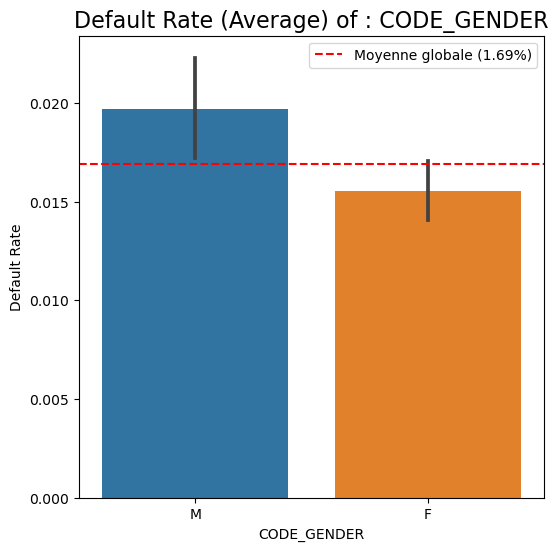

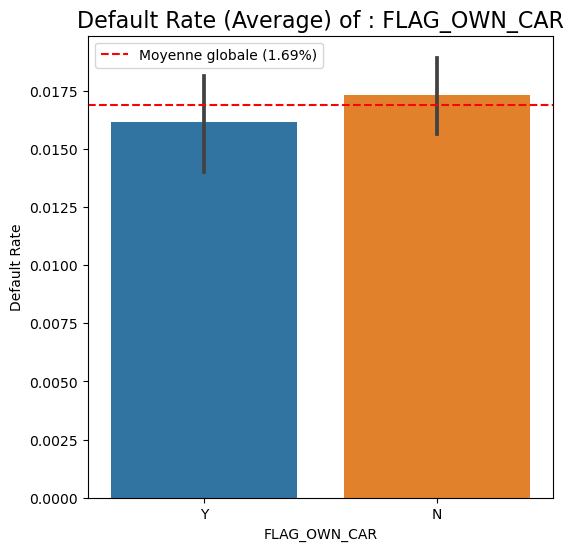

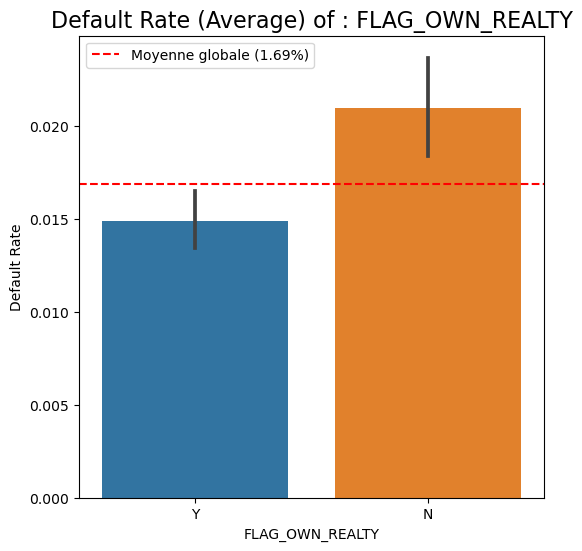

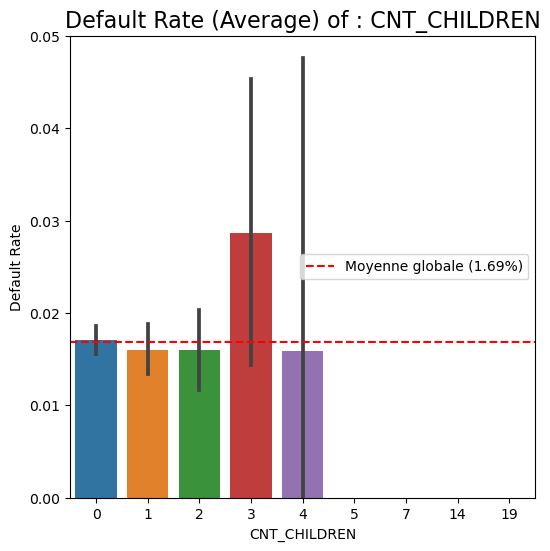

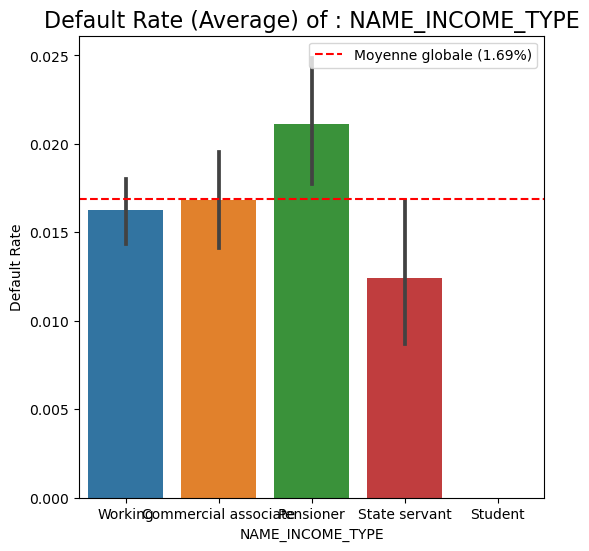

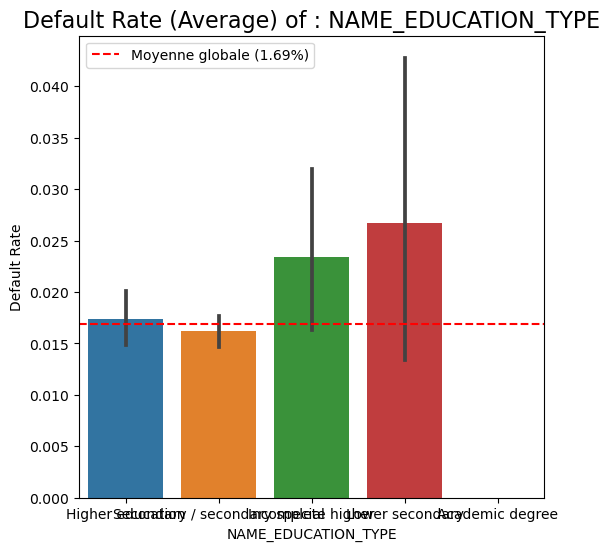

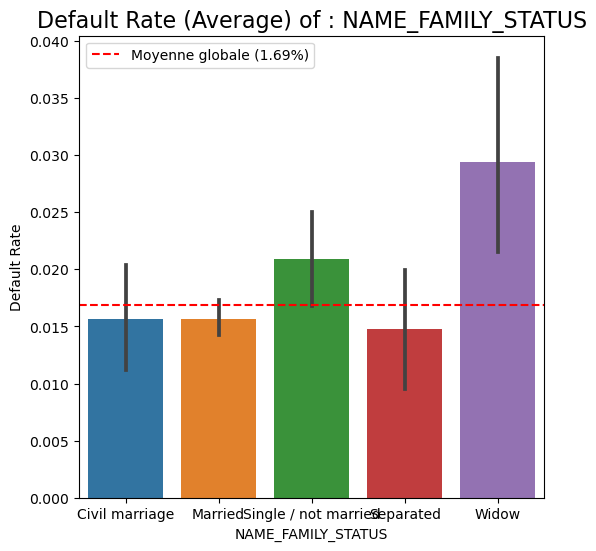

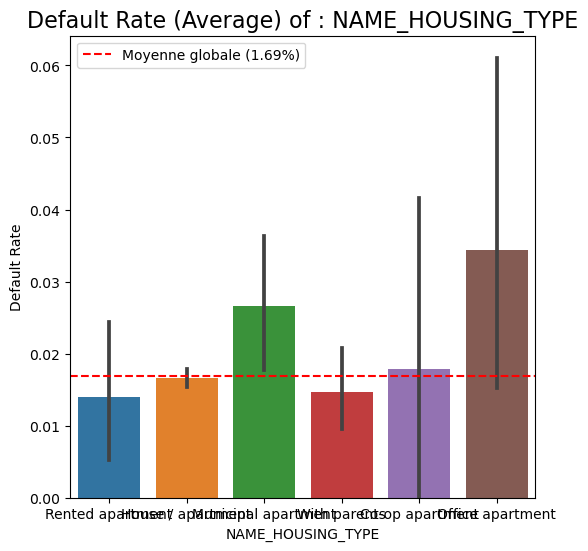

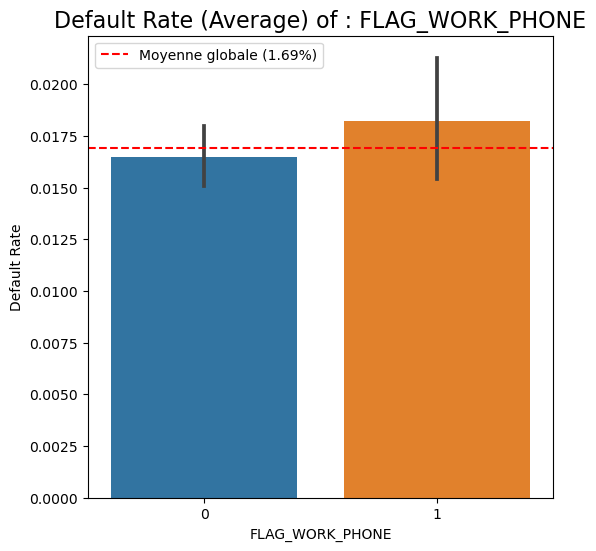

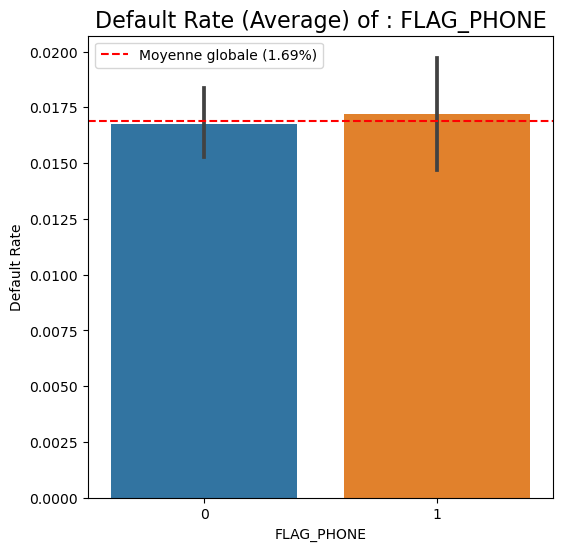

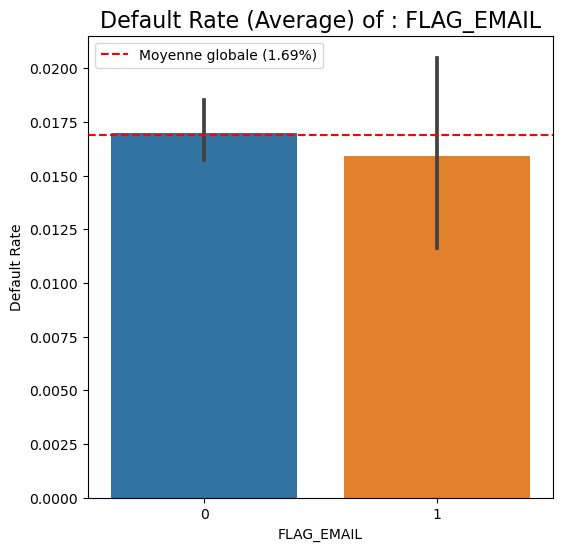

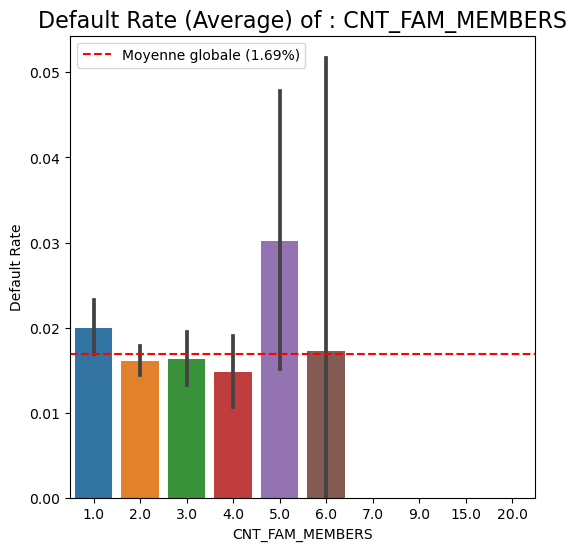

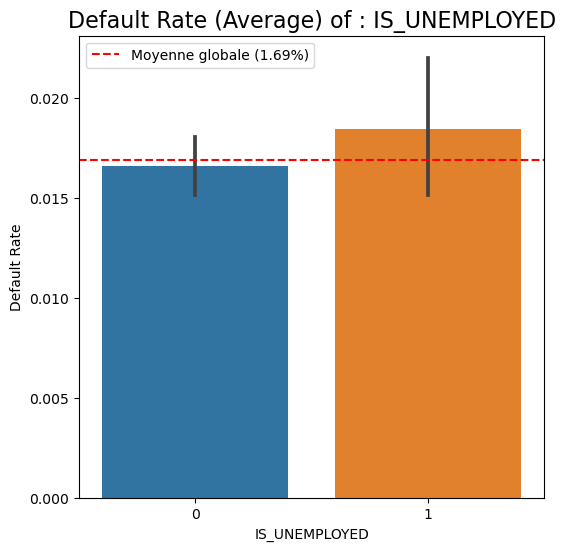

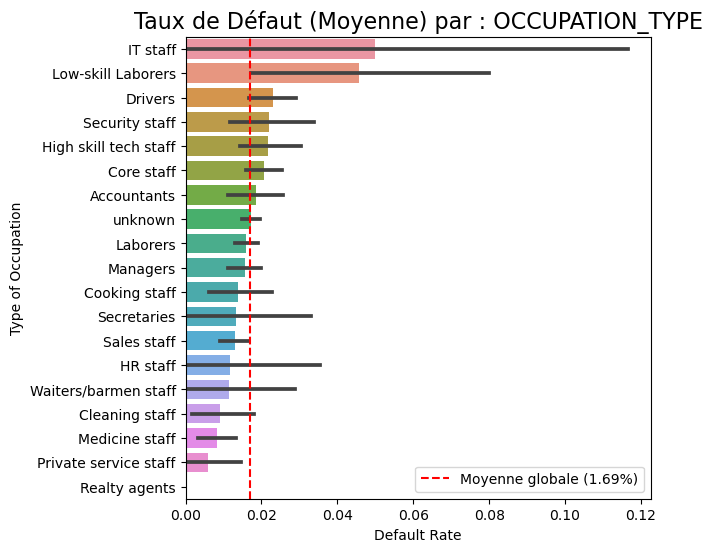

In [409]:
global_default_rate = df['STATUS_BINARY'].mean()
print(f"Default Rate (Average) of : {global_default_rate*100:.2f}%")

cols_to_plot = [
    'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
    'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 
    'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'IS_UNEMPLOYED'
]


for col in cols_to_plot:
    plt.figure(figsize=(6, 6))
    
    # sns.barplot calcule la MOYENNE de 'BINARY_STATUS' pour chaque 'col'
    ax = sns.barplot(x=col, y='STATUS_BINARY', data=df)
    
    # Ajouter la ligne de moyenne globale pour comparer
    ax.axhline(y=global_default_rate, color='red', linestyle='--', 
               label=f'Moyenne globale ({global_default_rate*100:.2f}%)')
    
    plt.title(f'Default Rate (Average) of : {col}', fontsize=16)
    plt.ylabel('Default Rate') 
    plt.xlabel(col)

    plt.legend()
    plt.show()

plt.figure(figsize=(6, 6))

ordered_categories = df.groupby('OCCUPATION_TYPE')['STATUS_BINARY'].mean().sort_values(ascending=False).index

ax = sns.barplot(y='OCCUPATION_TYPE', x='STATUS_BINARY', data=df, order=ordered_categories)

ax.axvline(x=global_default_rate, color='red', linestyle='--', 
           label=f'Moyenne globale ({global_default_rate*100:.2f}%)')

plt.title(f'Taux de Défaut (Moyenne) par : OCCUPATION_TYPE', fontsize=16)
plt.xlabel('Default Rate')
plt.ylabel('Type of Occupation')
plt.legend()
plt.show()

The first bar chart compares the average default rate between male (M) and female (F) clients in the dataset. It shows that men have a higher average default rate than women, and the global average default rate (1.69%) is indicated by the dashed red line, which falls between the values for both genders. This visual makes it clear that gender is associated with slight differences in the likelihood of credit default.

The second bar chart compares the average default rate between clients who own a car ("Y") and those who do not ("N"). It shows that the default rate for clients without a car is slightly higher than for car owners, with both rates hovering near the global default rate of 1.69% (marked by the dashed red line). This suggests that car ownership is associated with a marginally lower likelihood of credit default in this dataset.

The third bar chart compares the average default rate between clients who own real estate ("Y") and those who do not ("N"). The results show that clients without real estate have a much higher default rate than those who own property, with the non-owners' rate also exceeding the global average default rate of 1.69% (red dashed line). This indicates that real estate ownership is associated with a lower risk of credit default in this dataset.

The fourth bar chart shows the average default rate for clients based on the number of children ("CNT_CHILDREN") they have. The default rate increases as the number of children grows, exceeding the global default rate (1.69%, shown by the dashed red line) for clients with three or more children and showing especially high variability among those with four or more. This suggests that having more children is linked to a higher risk of credit default in the dataset.

The fifth bar chart presents the average default rate for each income type ("NAME_INCOME_TYPE") in the dataset. Pensioners have the highest default rate, which is well above the global average default rate of 1.69% (red dashed line), while state servants display the lowest risk. Working clients and commercial associates fall between these extremes but remain close to or under the global average, and students are not represented. This suggests that income type is an important predictor of credit default risk.

The sixth bar chart displays the average default rate for each education level ("NAME_EDUCATION_TYPE") in the dataset. Clients with "Lower secondary" education show the highest default rate, clearly above the global average default rate of 1.69% (indicated by the dashed red line), followed by those with "Incomplete higher" and other groups. In contrast, clients with "Higher education" and "Secondary/specialized secondary" have rates below or near the global average, indicating a pattern where lower education levels are linked to higher risk of credit default.

The seventh bar chart shows how the average default rate varies according to clients' family status ("NAME_FAMILY_STATUS"). Widowed clients have the highest default rate, well above the global average (1.69%, red dashed line), while those separated and married have the lowest rates, close to or below the global average. Clients who are single/not married or in civil marriage display intermediate default risks, suggesting marital status is related to credit default likelihood.

The 8th bar chart presents the average default rate for clients according to their type of housing ("NAME_HOUSING_TYPE"). Clients living in "Office apartment" have the highest default rate, far above the global average of 1.69% (red dashed line), followed by those in "Municipal apartment" and "Co-op apartment". In contrast, those living in "Rented apartment" or "With parents" show lower default rates. This indicates that certain housing types, especially less common ones, are associated with a significantly higher credit default risk.

The 9th bar chart shows the average default rate for clients with and without a work phone ("FLAG_WORK_PHONE"). Clients who have a work phone (1) tend to have a slightly higher default rate than those who do not (0), with the "work phone" group's rate above the global average default rate of 1.69% (shown by the red dashed line). This suggests that, in this dataset, having a work phone is weakly associated with greater credit default risk.

The 10th bar chart compares the average default rate for clients who do and do not have a registered phone ("FLAG_PHONE"). Both groups have similar default rates, with clients possessing a phone (1) showing a slightly higher default rate than those without (0), and both rates positioned close to the global default rate of 1.69% (red dashed line). This suggests that registering a phone number has limited impact on credit default risk in this dataset.

The 11th bar chart displays the average default rate for clients based on whether they have an email registered ("FLAG_EMAIL"). Both groups have similar default rates, which are just below the global average of 1.69% (red dashed line), suggesting that having an email address on file does not significantly influence the risk of default in this dataset.

The 12th bar chart displays the average default rate according to family size ("CNT_FAM_MEMBERS"). Families with one to four members have rates close to the global average (1.69%, red dashed line), while families with five or more members show higher and more variable default rates. Generally, a larger family size is associated with a greater risk of credit default in the dataset.

The 13th bar chart shows the average default rate for clients based on employment status ("IS_UNEMPLOYED"). Unemployed clients (1) have a higher default rate than employed clients (0), and their rate is above the global average default rate of 1.69% (indicated by the red dashed line). This demonstrates that unemployment is clearly associated with an increased risk of credit default in the dataset.

The last horizontal bar chart shows the average default rate for each occupation type ("OCCUPATION_TYPE"). The "IT staff" and "Low-skill Laborers" have the highest default rates—far above the global average of 1.69% (red dashed line) while "Realty agents," "Private service staff," and "Cleaning staff" appear to have the lowest risks. The chart highlights considerable variability in credit default risk across different jobs, with some groups (like IT staff) standing out as especially high risk in this dataset.

Colonnes numériques à visualiser : ['AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED']


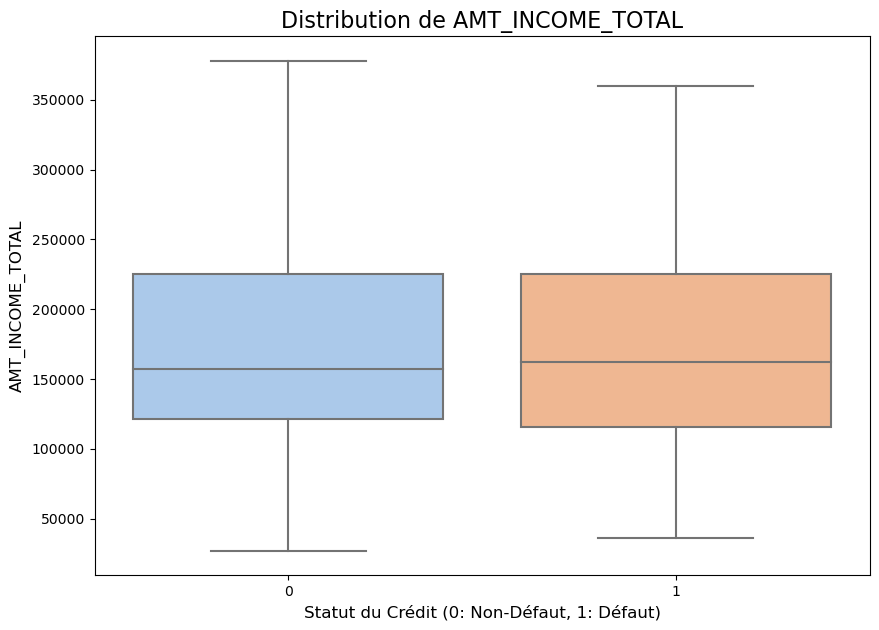

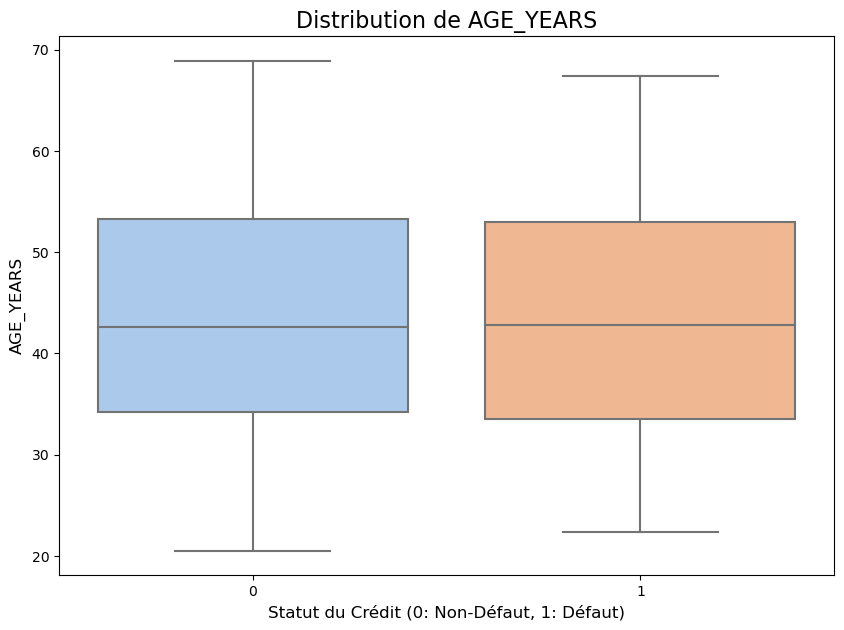

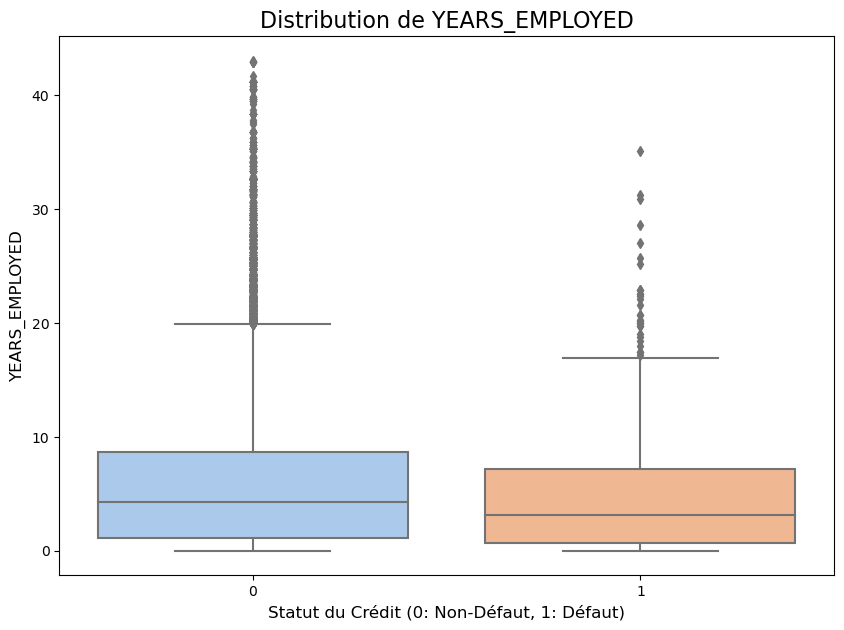

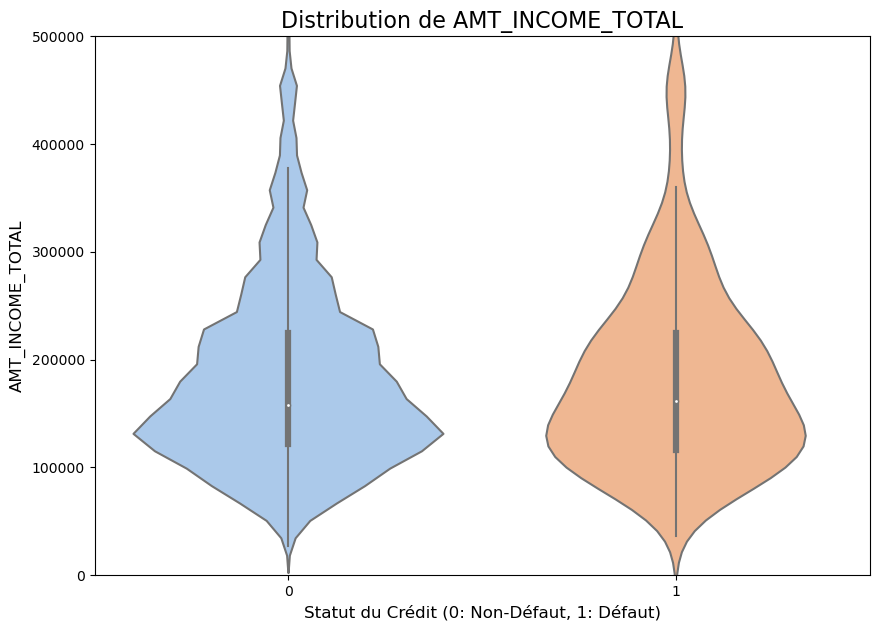

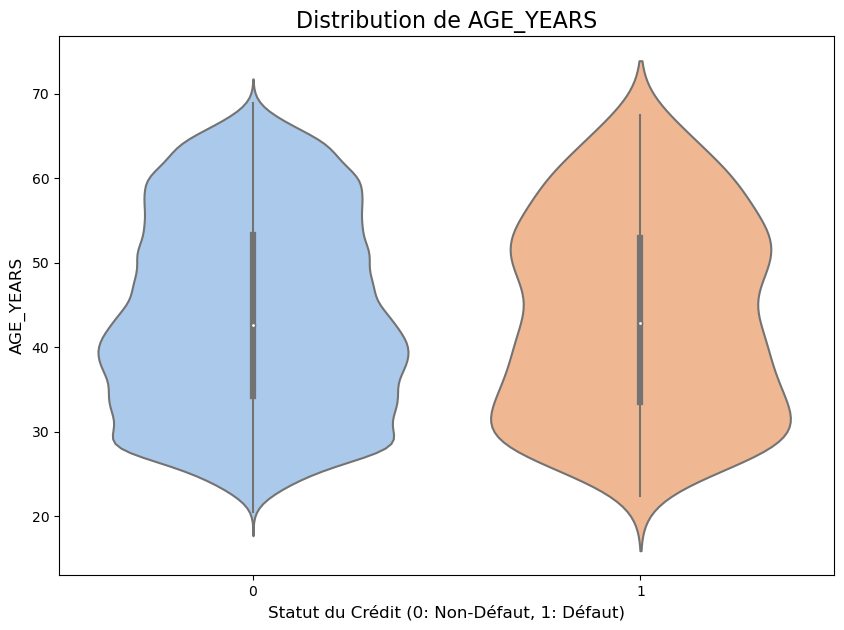

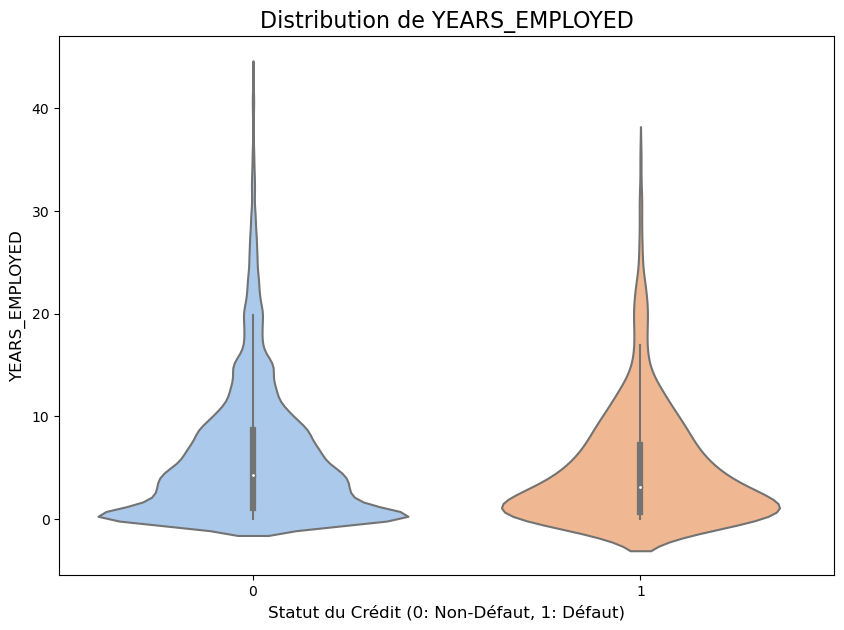

In [78]:
# now let's look at the column we left aside previously
numerical_cols = ['AMT_INCOME_TOTAL', 'AGE_YEARS', 'YEARS_EMPLOYED']
print(f"Colonnes numériques à visualiser : {numerical_cols}")

# Boxplots

for col in numerical_cols:
    plt.figure(figsize=(10, 7))
    
    if col == 'AMT_INCOME_TOTAL':
        # we hide the outliers because there is too many (with showfliers)
        ax = sns.boxplot(x='STATUS_BINARY', y=col, data=df, palette="pastel", showfliers=False)
        ax.set_title(f'Distribution de {col}', fontsize=16)
    else:
        ax = sns.boxplot(x='STATUS_BINARY', y=col, data=df, palette="pastel", showfliers=True)
        ax.set_title(f'Distribution de {col}', fontsize=16)

    plt.xlabel('Statut du Crédit (0: Non-Défaut, 1: Défaut)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.show()


for col in numerical_cols:
    plt.figure(figsize=(10, 7))
    
    if col == 'AMT_INCOME_TOTAL':
        ax = sns.violinplot(x='STATUS_BINARY', y=col, data=df, palette="pastel")
        ax.set_ylim(0, 500000) #we do a zoom else there is few high values that makes it less visible
        ax.set_title(f'Distribution de {col}', fontsize=16)
    else:
        ax = sns.violinplot(x='STATUS_BINARY', y=col, data=df, palette="pastel")
        ax.set_title(f'Distribution de {col}', fontsize=16)

    plt.xlabel('Statut du Crédit (0: Non-Défaut, 1: Défaut)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    plt.show()

The first boxplot shows the distribution of total income ("AMT_INCOME_TOTAL") for clients with different credit statuses: non-default (0) and default (1). The median and spread of income are very similar for both groups, meaning that the income distribution does not substantially differ between clients who defaulted and those who did not. This suggests that total income alone is not a strong indicator of default risk in this dataset.

The second boxplot illustrates the distribution of ages ("AGE_YEARS") for both non-defaulted (0) and defaulted (1) credit clients. The age distribution is very similar in both groups, with nearly identical medians and spreads, indicating that age does not significantly distinguish between default and non-default clients in this dataset.

The third boxplot shows the distribution of years of employment ("YEARS_EMPLOYED") for non-defaulted (0) and defaulted (1) clients. Clients who defaulted generally have fewer years of employment, with a lower median and slightly less spread than those who did not default. This suggests that shorter employment histories are associated with a higher risk of credit default in the dataset.

The first violin plot displays the distribution of total income ("AMT_INCOME_TOTAL") for non-defaulted (0) and defaulted (1) clients. The shapes, spreads, and medians are highly similar for both groups, confirming that income distributions are almost identical regardless of default status. This suggests that other factors may be more useful than income for distinguishing clients who defaulted versus those who did not.

The second violin plot shows the age distribution ("AGE_YEARS") for non-defaulted (0) and defaulted (1) credit clients. Both groups have almost identical distributions, similar shapes, medians, and spreads, indicating that age is not a major distinguishing factor between those who defaulted and those who did not in this dataset.

The third violin plot displays the distribution of years of employment ("YEARS_EMPLOYED") for non-defaulted (0) and defaulted (1) clients. The plot shows that defaulted clients generally have fewer years at their current job, with a lower median and overall shorter employment histories compared to non-defaulted clients. This visualization suggests that shorter employment duration is linked to higher credit default risk in the dataset.

Encoding and removing redundants variables (like married and civil marriage become married)



In [403]:
df_encod=df.copy()

df_encod['NAME_FAMILY_STATUS'] = df_encod['NAME_FAMILY_STATUS'].replace({'Civil marriage': 'Married'})
print(f"Family status. New values : {df['NAME_FAMILY_STATUS'].unique()}")
df_encod['NAME_EDUCATION_TYPE'] = df_encod['NAME_EDUCATION_TYPE'].replace({
    'Incomplete higher': 'Other_Education',
    'Lower secondary': 'Other_Education',
    'Academic degree': 'Other_Education'
})
print(f"Education. New values : {df_encod['NAME_EDUCATION_TYPE'].unique()}")
df_encod['CNT_CHILDREN_CAT'] = df_encod['CNT_CHILDREN'].apply(lambda x: 4 if x >= 4 else x).astype(str)
df_encod['CNT_FAM_MEMBERS_CAT'] = df_encod['CNT_FAM_MEMBERS'].apply(lambda x: 6 if x >= 6 else x).astype(str)

df_encod = df_encod.drop(columns=['CNT_CHILDREN', 'CNT_FAM_MEMBERS'])

#top_10_occupations = df_encod['OCCUPATION_TYPE'].value_counts().nlargest(10).index
#df_encod['OCCUPATION_TYPE_CAT'] = df_encod['OCCUPATION_TYPE'].apply(lambda x: x if x in top_10_occupations else 'Other_Occupation')
#df_encod = df_encod.drop(columns=['OCCUPATION_TYPE'])

Family status. New values : ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Education. New values : ['Higher education' 'Secondary / secondary special' 'Other_Education']


We do the split and now we need to decide what type of encoding to use between, pd.dummies, OneHotEncoder, LabelEncoder, OrdinalEncoder (the last 2 need a logic order which we don't have here so we won't use them for now and dummies have some risk to create some issues with the number of columns if there are some variables almost not represented) so for now we will use OneHotEncoder



In [192]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [194]:
y=df_encod["STATUS_BINARY"]
X=df_encod.drop(columns=["STATUS_BINARY","ID"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"Separated data : {X_train.shape[0]} Train data, {X_test.shape[0]} Test data")

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'string']).columns

print(f"Numerical Columns (need Scaling) : {list(numerical_cols)}")
print(f"Categorical Columns (need encoding) : {list(categorical_cols)}")

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)



Separated data : 29165 Train data, 7292 Test data
Numerical Columns (need Scaling) : ['AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'AGE_YEARS', 'YEARS_EMPLOYED']
Categorical Columns (need encoding) : ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_CHILDREN_CAT', 'CNT_FAM_MEMBERS_CAT']


Now let's fix the imbalancement, note that we have to do the SMOTE only on the train test else we would create fake data for the test and we would do testing data on data we created, so only the train is fixed, the test still has the same imbalacement

In [217]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [411]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

print(f"\nX_train (before SMOTE) : {X_train_processed.shape}")
print(f"Distribution of the classes (before SMOTE) : {Counter(y_train)}")

print(f"\nX_train (after SMOTE) : {X_train_smote.shape}")
print(f"Distribution of the classes (after SMOTE) : {Counter(y_train_smote)}")



X_train (before SMOTE) : (29165, 60)
Distribution of the classes (before SMOTE) : Counter({0: 28672, 1: 493})

X_train (after SMOTE) : (57344, 60)
Distribution of the classes (after SMOTE) : Counter({0: 28672, 1: 28672})


Let's test a first model, basic one for now that is interpretable the DecisionTreeClassifier

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


--- Report of Classification ---
                      precision    recall  f1-score   support

Class 0 (No-Default)       0.99      0.99      0.99      7169
   Class 1 (Default)       0.25      0.27      0.26       123

            accuracy                           0.97      7292
           macro avg       0.62      0.63      0.62      7292
        weighted avg       0.97      0.97      0.97      7292


--- Confusion Matrix---
[[7070   99]
 [  90   33]]


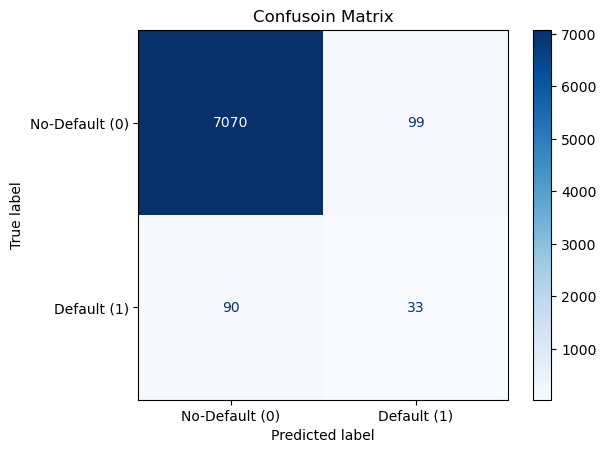

In [415]:
dt_model = DecisionTreeClassifier(max_depth=100, random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred = dt_model.predict(X_test_processed)
print("\n--- Report of Classification ---")
# This is what we use to evaluate a model (it contains recall, f1, precision)
print(classification_report(y_test, y_pred, target_names=['Class 0 (No-Default)', 'Class 1 (Default)']))

print("\n--- Confusion Matrix---")
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Display graphic of the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['No-Default (0)', 'Default (1)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusoin Matrix")
plt.show()

SMOTE was applied to the dataset before this Decision Tree classifier evaluation, yet the classification report still shows a very high accuracy for the non-default (majority) class and a low recall and precision for the default (minority) class. This suggests that the model’s ability to identify default cases did not improve substantially, likely because the class imbalance was so strong that it still struggled to generalize to defaults, or the synthetic samples generated by SMOTE were not sufficient to change the learned boundaries for this classifier. Overall, despite SMOTE, the Decision Tree remains biased towards predicting non-defaults, as reflected by the low f1-score for defaults.

The confusion matrix for the Decision Tree classifier summarizes how the model performed on the test data. Out of all true non-default cases, 7070 were correctly identified ("true negatives") and 99 were incorrectly predicted as defaults ("false positives"). For true default cases, the model correctly identified 33 ("true positives") and missed 90, classifying them as non-defaults ("false negatives"). This shows the classifier is highly accurate with non-defaults but continues to miss a majority of the actual defaults, demonstrating the persistent challenge with detecting rare events even after data balancing steps like SMOTE.

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Modèle Régression Logistique entraîné.

--- Rapport de Classification (Régression Logistique) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.58      0.73      7169
    Classe 1 (Défaut)       0.02      0.50      0.04       123

             accuracy                           0.58      7292
            macro avg       0.50      0.54      0.38      7292
         weighted avg       0.97      0.58      0.72      7292

Matrice de Confusion (Régression Logistique):
[[4159 3010]
 [  61   62]]


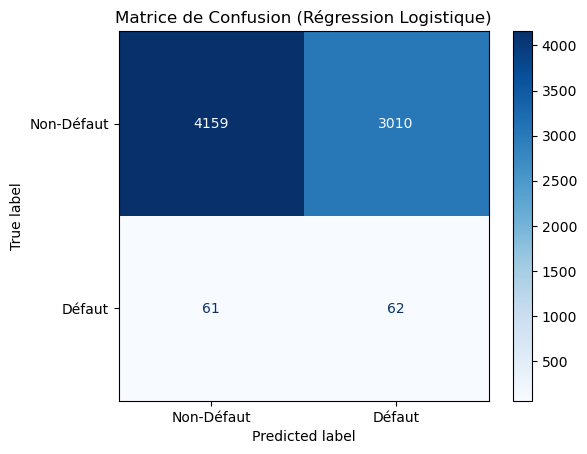

In [235]:
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Entraînement sur les données SMOTE
log_reg_model.fit(X_train_smote, y_train_smote)
print("Modèle Régression Logistique entraîné.")

# Évaluation sur le set de Test
y_pred_log_reg = log_reg_model.predict(X_test_processed)

print("\n--- Rapport de Classification (Régression Logistique) ---")
print(classification_report(y_test, y_pred_log_reg, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Matrice de Confusion (Régression Logistique):")
print(cm_log_reg)

# Affichage graphique
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['Non-Défaut', 'Défaut'])
disp_log_reg.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Régression Logistique)")
plt.show()

Those results for logistic regression after applying SMOTE show that the model achieves a recall of 0.50 for the default class, meaning it correctly identifies half of actual defaults, but the precision for defaults is extremely low (0.02), leading to a very low f1-score. The model sacrifices overall accuracy (0.58) to detect more defaults, as shown in the confusion matrix: out of 123 true defaults, 62 are found, but 3009 non-default cases are misclassified as defaults which is too much to be consider viable even though it gets a 50% recall. The high false-positive rate for defaults indicates that the model now over-predicts defaults at the cost of accuracy and precision.


--- Entraînement Modèle 2: Random Forest ---
Modèle Random Forest entraîné.

--- Rapport de Classification (Random Forest) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.99      0.99      7169
    Classe 1 (Défaut)       0.29      0.24      0.27       123

             accuracy                           0.98      7292
            macro avg       0.64      0.62      0.63      7292
         weighted avg       0.98      0.98      0.98      7292

Matrice de Confusion (Random Forest):
[[7096   73]
 [  93   30]]


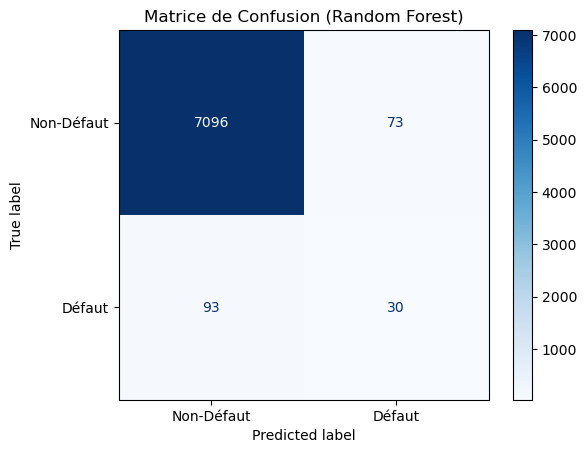

In [257]:
print("\n--- Entraînement Modèle 2: Random Forest ---")

rf_model = RandomForestClassifier(random_state=42, n_estimators=100) 

# Entraînement sur les données SMOTE
rf_model.fit(X_train_smote, y_train_smote)
print("Modèle Random Forest entraîné.")

# Évaluation sur le set de Test
y_pred_rf = rf_model.predict(X_test_processed)

print("\n--- Rapport de Classification (Random Forest) ---")
print(classification_report(y_test, y_pred_rf, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Matrice de Confusion (Random Forest):")
print(cm_rf)

# Affichage graphique
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Non-Défaut', 'Défaut'])
disp_rf.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Random Forest)")
plt.show()

We are now going to use parameter grids to find possibly some better estimators


Lancement du GridSearchCV sur les données DÉSÉQUILIBRÉES...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearchCV terminé.

Les meilleurs paramètres trouvés sont :
{'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 200}

Évaluation du 'Meilleur Estimateur' sur le set de Test...

--- Rapport de Classification (Meilleur RF, sans SMOTE) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.97      0.98      7169
    Classe 1 (Défaut)       0.15      0.33      0.21       123

             accuracy                           0.96      7292
            macro avg       0.57      0.65      0.59      7292
         weighted avg       0.97      0.96      0.97      7292

Matrice de Confusion (Meilleur RF, sans SMOTE):
[[6947  222]
 [  83   40]]


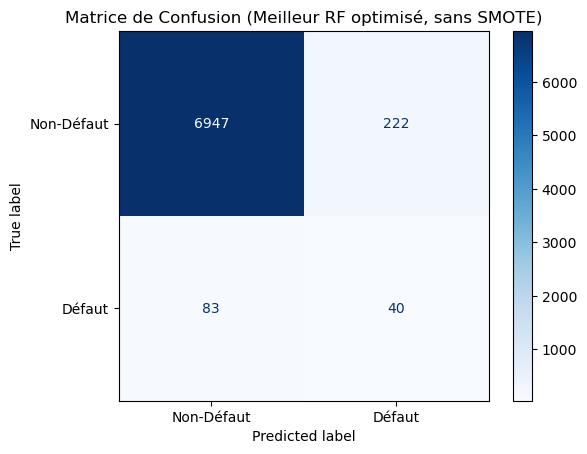

In [357]:
# C'est la même grille que la dernière fois
param_grid = {
    'n_estimators': [100, 200],         
    'max_depth': [10, 20],              
    'min_samples_leaf': [5, 10],        
    'class_weight': ['balanced', 'balanced_subsample'] # CLÉ : Maintenant, ce paramètre travaille sur les VRAIES données
}

# --- 3. Initialiser GridSearchCV ---
rf = RandomForestClassifier(random_state=42)

# scoring='recall' est notre objectif
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='f1', # On maximise le Rappel !
                           n_jobs=-1,
                           verbose=2)

# --- 4. Lancer l'Optimisation ---
print("\nLancement du GridSearchCV sur les données DÉSÉQUILIBRÉES...")
# Entraînement sur les données ORIGINALES (X_train, y_train)
grid_search.fit(X_train_processed, y_train)
print("GridSearchCV terminé.")

# --- 5. Afficher les Meilleurs Paramètres ---
print(f"\nLes meilleurs paramètres trouvés sont :")
print(grid_search.best_params_)

# --- 6. Évaluation du "Meilleur Modèle" ---
print("\nÉvaluation du 'Meilleur Estimateur' sur le set de Test...")

best_rf_model = grid_search.best_estimator_

# Prédiction sur le set de test
y_pred_best_rf = best_rf_model.predict(X_test_processed)

print("\n--- Rapport de Classification (Meilleur RF, sans SMOTE) ---")
print(classification_report(y_test, y_pred_best_rf, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Matrice de Confusion (Meilleur RF, sans SMOTE):")
print(cm_best_rf)

# Affichage graphique
disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['Non-Défaut', 'Défaut'])
disp_best_rf.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Meilleur RF optimisé, sans SMOTE)")
plt.show()

**SUPPRIMER ET FAIRE L'ANALYSE JUSTE POUR CAT ET XGBOOST QUI SONT MEILLEURS**


--- Rapport de Classification (Meilleur RF, sans SMOTE) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.97      0.98      7169
    Classe 1 (Défaut)       0.15      0.33      0.21       123

             accuracy                           0.96      7292
            macro avg       0.57      0.65      0.59      7292
         weighted avg       0.97      0.96      0.97      7292

Matrice de Confusion (Meilleur RF, sans SMOTE):
[[6947  222]
 [  83   40]]


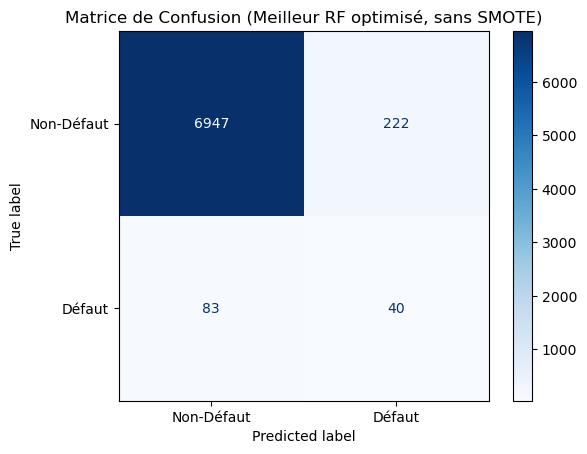

--- 10. Importance des Caractéristiques ---

--- Top 10 des Caractéristiques les plus importantes ---
                                              Feature  Importance
4                                      num__AGE_YEARS    0.164753
5                                 num__YEARS_EMPLOYED    0.143346
0                               num__AMT_INCOME_TOTAL    0.131609
2                                     num__FLAG_PHONE    0.027581
8                                 cat__FLAG_OWN_CAR_N    0.022058
1                                num__FLAG_WORK_PHONE    0.021711
19  cat__NAME_EDUCATION_TYPE_Secondary / secondary...    0.021693
9                                 cat__FLAG_OWN_CAR_Y    0.021427
48                       cat__OCCUPATION_TYPE_unknown    0.020186
16                      cat__NAME_INCOME_TYPE_Working    0.020042


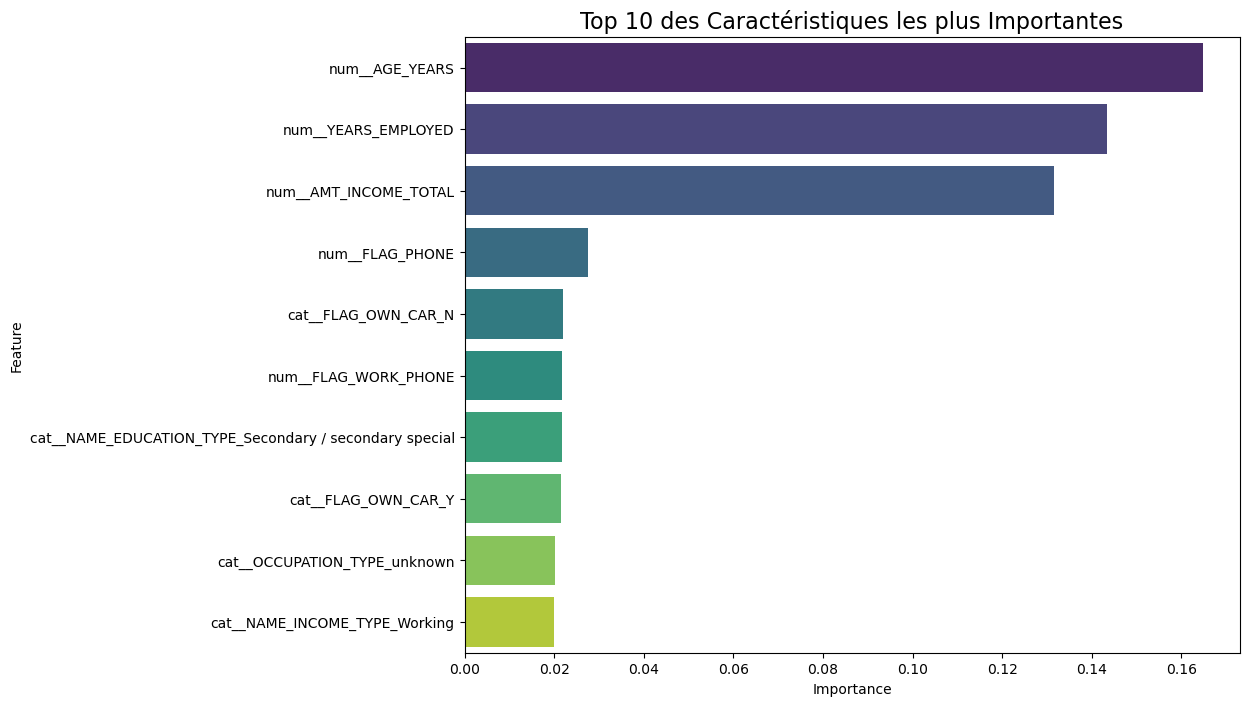

In [273]:
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_processed)

print("\n--- Rapport de Classification (Meilleur RF, sans SMOTE) ---")
print(classification_report(y_test, y_pred_best_rf, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Matrice de Confusion (Meilleur RF, sans SMOTE):")
print(cm_best_rf)

disp_best_rf = ConfusionMatrixDisplay(confusion_matrix=cm_best_rf, display_labels=['Non-Défaut', 'Défaut'])
disp_best_rf.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Meilleur RF optimisé, sans SMOTE)")
plt.show()
feature_names = preprocessor.get_feature_names_out()
# --- 11. Importance des Caractéristiques ---
print("--- 10. Importance des Caractéristiques ---")
importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Sélectionner le Top 10
top_10_features = importance_df.head(10)

print("\n--- Top 10 des Caractéristiques les plus importantes ---")
print(top_10_features)

# Visualiser
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 des Caractéristiques les plus Importantes', fontsize=16)
plt.show()

**PAREIL SUPPRIMER ET FAIRE L'ANALYSE JUSTE POUR CAT ET XGBOOST QUI SONT MEILLEURS**

Entraînement du modèle RF par défaut sur les données SMOTE...
Modèle entraîné.
Extraction de l'importance des caractéristiques...

--- Top 10 des Caractéristiques (Modèle SMOTE) ---
                                       Feature  Importance
4                               num__AGE_YEARS    0.104321
0                        num__AMT_INCOME_TOTAL    0.095720
5                          num__YEARS_EMPLOYED    0.065075
10                      cat__FLAG_OWN_REALTY_N    0.037244
38               cat__OCCUPATION_TYPE_Laborers    0.032583
11                      cat__FLAG_OWN_REALTY_Y    0.031384
12  cat__NAME_INCOME_TYPE_Commercial associate    0.029895
16               cat__NAME_INCOME_TYPE_Working    0.028787
7                           cat__CODE_GENDER_M    0.027769
9                          cat__FLAG_OWN_CAR_Y    0.027168

Création du graphique...


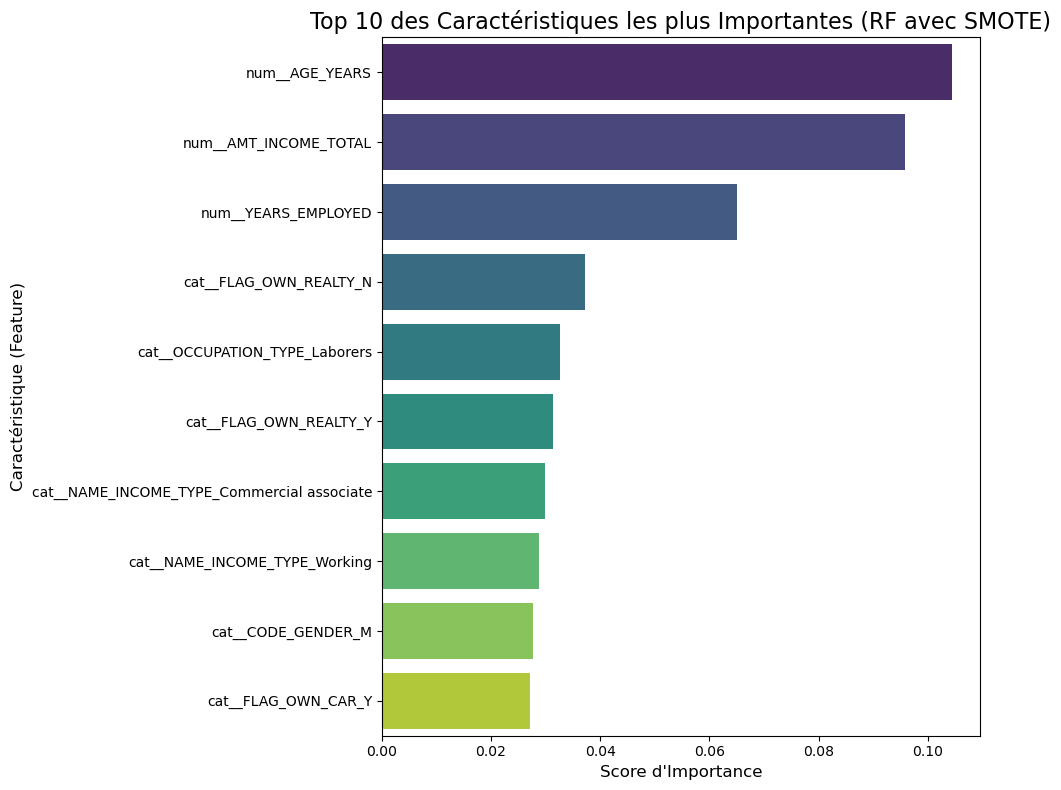

In [277]:
# --- 2. Recréer le Modèle "RF par Défaut" (celui entraîné sur SMOTE) ---
print("Entraînement du modèle RF par défaut sur les données SMOTE...")
# C'était un RF par défaut, n_estimators=100
default_rf_smote_model = RandomForestClassifier(n_estimators=100, 
                                                random_state=42, 
                                                n_jobs=-1)

# On entraîne le modèle sur les données SMOTE
default_rf_smote_model.fit(X_train_smote, y_train_smote)
print("Modèle entraîné.")

# --- 3. Extraire l'Importance des Caractéristiques ---
print("Extraction de l'importance des caractéristiques...")

# Récupérer les noms des colonnes (features)
feature_names = preprocessor.get_feature_names_out()

# Récupérer les scores d'importance du modèle
importances = default_rf_smote_model.feature_importances_

# Créer un DataFrame pour une manipulation facile
importance_df_smote = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Sélectionner le Top 10
top_10_features_smote = importance_df_smote.head(10)

print("\n--- Top 10 des Caractéristiques (Modèle SMOTE) ---")
print(top_10_features_smote)

# --- 4. Visualiser le Top 10 ---
print("\nCréation du graphique...")
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_10_features_smote, palette='viridis')
plt.title('Top 10 des Caractéristiques les plus Importantes (RF avec SMOTE)', fontsize=16)
plt.xlabel('Score d\'Importance', fontsize=12)
plt.ylabel('Caractéristique (Feature)', fontsize=12)
plt.tight_layout()
plt.show() # Utilisez plt.savefig('feature_importance_smote.png') pour sauvegarder

Now let's test some new models, first the xgboost, we are going to try him with the smote (**IL MANQUE LE WITH THE SMOTE ( mais je sais que c'est moins bien juste je l'ai supprimé je crois à remettre**), without the SMOTE, without SMOTE with grid parameters

In [375]:
from xgboost import XGBClassifier 

xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=100,
                          n_jobs=-1,
                          eval_metric='logloss') # Pour supprimer un avertissement

xgb_model.fit(X_train_smote, y_train_smote)
print("Modèle XGBoost (with SMOTE) entraîné.")

# Évaluation
y_pred_xgb = xgb_model.predict(X_test_processed)

print("\n--- Rapport de Classification (XGBoost with SMOTE) ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Classe 0', 'Classe 1 (Défaut)']))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Matrice de Confusion (XGBoost with SMOTE):")
print(cm_xgb)

Modèle XGBoost (with SMOTE) entraîné.

--- Rapport de Classification (XGBoost with SMOTE) ---
                   precision    recall  f1-score   support

         Classe 0       0.99      0.99      0.99      7169
Classe 1 (Défaut)       0.20      0.21      0.20       123

         accuracy                           0.97      7292
        macro avg       0.59      0.60      0.59      7292
     weighted avg       0.97      0.97      0.97      7292

Matrice de Confusion (XGBoost with SMOTE):
[[7062  107]
 [  97   26]]


In [377]:
print("\n--- Entraînement Modèle B: XGBoost (sans SMOTE) ---")

# Calcul du poids pour 'scale_pos_weight'
counts = Counter(y_train)
scale_pos_weight = counts[0] / counts[1]
print(f"Calcul du 'scale_pos_weight' : {scale_pos_weight:.2f} (soit {counts[0]} / {counts[1]})")

xgb_model = XGBClassifier(random_state=42, 
                          n_estimators=100,
                          scale_pos_weight=scale_pos_weight, # Équivalent de class_weight
                          n_jobs=-1,
                          eval_metric='logloss') # Pour supprimer un avertissement

xgb_model.fit(X_train_processed, y_train)
print("Modèle XGBoost (sans SMOTE) entraîné.")

# Évaluation
y_pred_xgb = xgb_model.predict(X_test_processed)

print("\n--- Rapport de Classification (XGBoost sans SMOTE) ---")
print(classification_report(y_test, y_pred_xgb, target_names=['Classe 0', 'Classe 1 (Défaut)']))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Matrice de Confusion (XGBoost sans SMOTE):")
print(cm_xgb)


--- Entraînement Modèle B: XGBoost (sans SMOTE) ---
Calcul du 'scale_pos_weight' : 58.16 (soit 28672 / 493)
Modèle XGBoost (sans SMOTE) entraîné.

--- Rapport de Classification (XGBoost sans SMOTE) ---
                   precision    recall  f1-score   support

         Classe 0       0.99      0.96      0.97      7169
Classe 1 (Défaut)       0.15      0.46      0.23       123

         accuracy                           0.95      7292
        macro avg       0.57      0.71      0.60      7292
     weighted avg       0.98      0.95      0.96      7292

Matrice de Confusion (XGBoost sans SMOTE):
[[6851  318]
 [  67   56]]


Utilisation du 'scale_pos_weight' fixe : 58.16

Définition de la grille de recherche (param_grid) pour XGBoost...

Lancement du GridSearchCV sur XGBoost... (Cela peut prendre plusieurs minutes)
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV (XGBoost) terminé.

Les meilleurs paramètres trouvés pour XGBoost sont :
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}

Évaluation du 'Meilleur Estimateur' XGBoost sur le set de Test...

--- Rapport de Classification (Meilleur XGBoost) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.97      0.98      7169
    Classe 1 (Défaut)       0.20      0.46      0.28       123

             accuracy                           0.96      7292
            macro avg       0.60      0.71      0.63      7292
         weighted avg       0.98      0.96      0.97      7292

Matrice de Confusion (Meilleur XGBoost):
[[6951  218]
 [  67   56]]


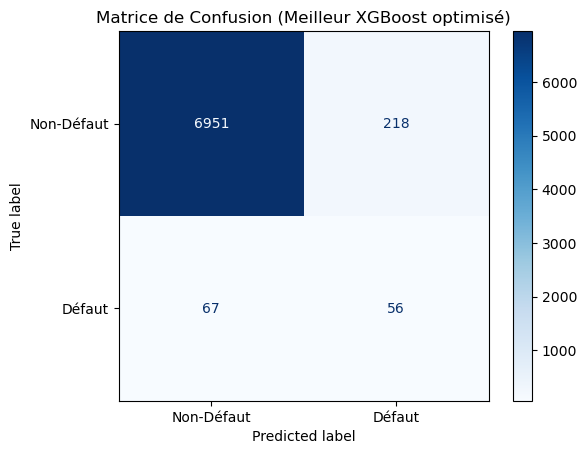

In [285]:
# --- 2. Calculer le poids pour XGBoost ---
counts = Counter(y_train)
scale_pos_weight = counts[0] / counts[1]
print(f"Utilisation du 'scale_pos_weight' fixe : {scale_pos_weight:.2f}")

# --- 3. Définir la Grille de Recherche pour XGBoost ---
print("\nDéfinition de la grille de recherche (param_grid) pour XGBoost...")

# Grille de test pour XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],         # Nombre d'arbres
    'max_depth': [5, 10],               # Profondeur (5 est souvent bon pour la généralisation)
    'learning_rate': [0.05, 0.1]        # Taux d'apprentissage
}

# --- 4. Initialiser GridSearchCV ---
# On crée un estimateur XGBoost DE BASE
# On fixe les paramètres qui ne sont PAS dans la grille
xgb_base = XGBClassifier(random_state=42, 
                         scale_pos_weight=scale_pos_weight, # On le fixe !
                         n_jobs=-1,
                         eval_metric='logloss')

grid_search_xgb = GridSearchCV(estimator=xgb_base, 
                               param_grid=param_grid_xgb, 
                               cv=3, 
                               scoring='f1', 
                               n_jobs=-1,
                               verbose=2)

# --- 5. Lancer l'Optimisation ---
print("\nLancement du GridSearchCV sur XGBoost... (Cela peut prendre plusieurs minutes)")
grid_search_xgb.fit(X_train_processed, y_train)
print("GridSearchCV (XGBoost) terminé.")

# --- 6. Afficher les Meilleurs Paramètres ---
print(f"\nLes meilleurs paramètres trouvés pour XGBoost sont :")
print(grid_search_xgb.best_params_)

# --- 7. Évaluation du "Meilleur Modèle" ---
print("\nÉvaluation du 'Meilleur Estimateur' XGBoost sur le set de Test...")

best_xgb_model = grid_search_xgb.best_estimator_

y_pred_best_xgb = best_xgb_model.predict(X_test_processed)

print("\n--- Rapport de Classification (Meilleur XGBoost) ---")
print(classification_report(y_test, y_pred_best_xgb, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)
print("Matrice de Confusion (Meilleur XGBoost):")
print(cm_best_xgb)

# Affichage graphique
disp_best_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_best_xgb, display_labels=['Non-Défaut', 'Défaut'])
disp_best_xgb.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Meilleur XGBoost optimisé)")
plt.show()

We obtain a better result with the grid search, we go from 318 to only 218 default while it was non-Defaults it is for now our best model but we still have to try cat boost and then the voting of the several algorithms

In [291]:
from catboost import CatBoostClassifier

**THE BEST OF THE BESTS**

This one gave the best results, in terms of recall for the 1 with 63 default found but he got more default while it's non default

In [293]:
# Expert 4 : CatBoost (Le nouveau challenger)
clf_cat = CatBoostClassifier(random_state=42,
                             n_estimators=200, # On utilise 200 pour être comparable
                             scale_pos_weight=scale_pos_weight, # On utilise le même poids
                             verbose=0) # 'verbose=0' pour le rendre silencieux

clf_cat.fit(X_train_processed, y_train)
print("Modèle CAT (sans SMOTE) entraîné.")

# Évaluation
y_pred_cat = clf_cat.predict(X_test_processed)

print("\n--- Rapport de Classification (CAT sans SMOTE) ---")
print(classification_report(y_test, y_pred_cat, target_names=['Classe 0', 'Classe 1 (Défaut)']))
cm_cat = confusion_matrix(y_test, y_pred_cat)
print("Matrice de Confusion (CAT sans SMOTE):")
print(cm_cat)

Modèle CAT (sans SMOTE) entraîné.

--- Rapport de Classification (CAT sans SMOTE) ---
                   precision    recall  f1-score   support

         Classe 0       0.99      0.95      0.97      7169
Classe 1 (Défaut)       0.14      0.51      0.23       123

         accuracy                           0.94      7292
        macro avg       0.57      0.73      0.60      7292
     weighted avg       0.98      0.94      0.96      7292

Matrice de Confusion (CAT sans SMOTE):
[[6796  373]
 [  60   63]]


Lancement du GridSearchCV sur CatBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
GridSearchCV (CatBoost) terminé.
Meilleurs paramètres trouvés : {'depth': 10, 'learning_rate': 0.1, 'n_estimators': 200, 'scale_pos_weight': 58.16}

Évaluation du 'Meilleur Estimateur' Cat sur le set de Test...

--- Rapport de Classification (Meilleur Cat) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.97      0.98      7169
    Classe 1 (Défaut)       0.18      0.44      0.25       123

             accuracy                           0.96      7292
            macro avg       0.58      0.70      0.62      7292
         weighted avg       0.98      0.96      0.97      7292

Matrice de Confusion (Meilleur Cat):
[[6919  250]
 [  69   54]]


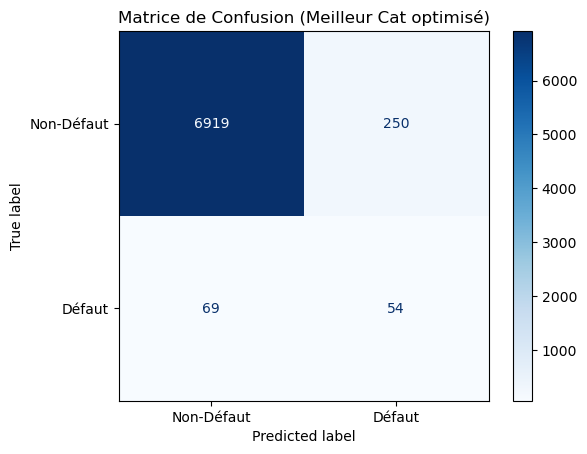

In [302]:
# Grille de recherche pour CatBoost (8 combinaisons)
param_grid_cat = {
    'n_estimators': [100, 200],         # Alias pour 'iterations'
    'learning_rate': [0.05, 0.1],       # Taux d'apprentissage
    'depth': [5, 10],                   # Profondeur des arbres (alias pour 'max_depth')
    
    # On fixe le paramètre le plus important (pas de recherche)
    'scale_pos_weight': [58.16]         
}
cat_base = CatBoostClassifier(random_state=42, scale_pos_weight=scale_pos_weight, verbose=0)

# 4. Configurer le GridSearch pour le RAPPEL (Recall)
grid_search_cat = GridSearchCV(estimator=cat_base, 
                               param_grid=param_grid_cat, 
                               cv=3, 
                               scoring='f1', # Toujours optimiser pour le Rappel !
                               n_jobs=-1,
                               verbose=2)

# 5. Lancer l'entraînement
print("Lancement du GridSearchCV sur CatBoost...")
grid_search_cat.fit(X_train_processed, y_train)

print("GridSearchCV (CatBoost) terminé.")
print(f"Meilleurs paramètres trouvés : {grid_search_cat.best_params_}")

# --- 7. Évaluation du "Meilleur Modèle" ---
print("\nÉvaluation du 'Meilleur Estimateur' Cat sur le set de Test...")

best_cat_model = grid_search_cat.best_estimator_

y_pred_best_cat = best_cat_model.predict(X_test_processed)

print("\n--- Rapport de Classification (Meilleur Cat) ---")
print(classification_report(y_test, y_pred_best_cat, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_best_cat = confusion_matrix(y_test, y_pred_best_cat)
print("Matrice de Confusion (Meilleur Cat):")
print(cm_best_cat)

# Affichage graphique
disp_best_cat = ConfusionMatrixDisplay(confusion_matrix=cm_best_cat, display_labels=['Non-Défaut', 'Défaut'])
disp_best_cat.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Meilleur Cat optimisé)")
plt.show()

In [307]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

Voting for the Team without smote (best random forest, best cat, best xgboost, with a soft vote so we take into account the probabilities)


--- 2. Création du 'Non-SMOTE Team' (VotingClassifier) ---
Entraînement du 'super-modèle'... (Cela peut prendre un moment)
VotingClassifier entraîné.

--- Rapport de Classification (VotingClassifier Non-SMOTE) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.97      0.98      7169
    Classe 1 (Défaut)       0.20      0.46      0.28       123

             accuracy                           0.96      7292
            macro avg       0.60      0.71      0.63      7292
         weighted avg       0.98      0.96      0.97      7292

Matrice de Confusion (VotingClassifier Non-SMOTE):
[[6945  224]
 [  67   56]]


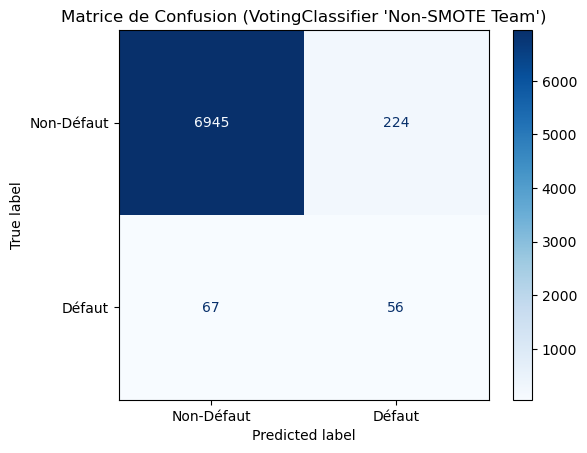

In [311]:
# --- Expert 1: Le "Meilleur" Random Forest ---
clf_rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_leaf=5,
    class_weight='balanced', # Clé
    random_state=42,
    n_jobs=-1
)

# --- Expert 2: Le "Meilleur" XGBoost ---
# (Paramètres de votre GridSearch XGB, qui a donné 46% Rappel et 20% Précision)
clf_xgb_best = XGBClassifier(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight, # Clé
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)

# --- Expert 3: Le "Meilleur" CatBoost ---
# (Modèle par défaut qui a donné 51% de Rappel)
clf_cat_best = CatBoostClassifier(
    n_estimators=200,
    scale_pos_weight=scale_pos_weight, # Clé
    random_state=42,
    verbose=0 # Silencieux
)

print("\n--- 2. Création du 'Non-SMOTE Team' (VotingClassifier) ---")

# On regroupe les 3 "recettes"
# voting='soft' est crucial : il moyenne les probabilités (plus nuancé)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', clf_rf_best), 
        ('xgb', clf_xgb_best), 
        ('cat', clf_cat_best)
    ],
    voting='soft', # Vote par probabilité
    n_jobs=1
)

print("Entraînement du 'super-modèle'... (Cela peut prendre un moment)")
voting_clf.fit(X_train_processed, y_train)
print("VotingClassifier entraîné.")

# Évaluation sur le set de test
y_pred_voting = voting_clf.predict(X_test_processed)

print("\n--- Rapport de Classification (VotingClassifier Non-SMOTE) ---")
print(classification_report(y_test, y_pred_voting, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_voting = confusion_matrix(y_test, y_pred_voting)
print("Matrice de Confusion (VotingClassifier Non-SMOTE):")
print(cm_voting)

disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=['Non-Défaut', 'Défaut'])
disp_voting.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (VotingClassifier 'Non-SMOTE Team')")
plt.show()

Test that consider 1 each time a model says it is 1 even if the 2 others disagree

Prédictions individuelles récupérées.
--- 2. Combinaison du vote (si 1 voix dit 'Défaut', alors 'Défaut') ---
--- 3. Évaluation du Vote 'Tolérance Zéro' ---

--- Rapport de Classification (Vote Tolérance Zéro) ---
                       precision    recall  f1-score   support

Classe 0 (Non-Défaut)       0.99      0.94      0.97      7169
    Classe 1 (Défaut)       0.13      0.51      0.21       123

             accuracy                           0.94      7292
            macro avg       0.56      0.73      0.59      7292
         weighted avg       0.98      0.94      0.95      7292

Matrice de Confusion (Vote Tolérance Zéro):
[[6759  410]
 [  60   63]]


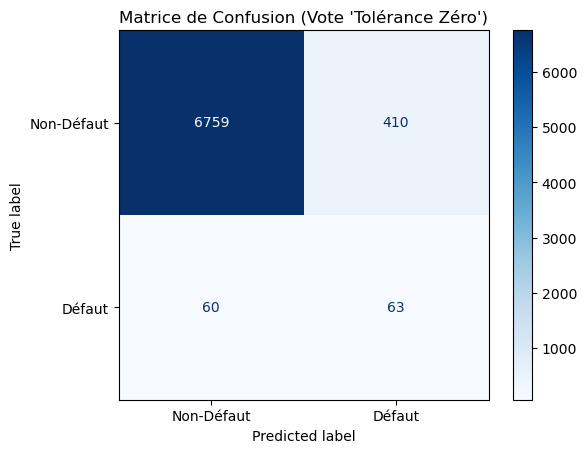

In [331]:
clf_rf_best.fit(X_train_processed, y_train)
    
clf_xgb_best.fit(X_train_processed, y_train)
    
clf_cat_best.fit(X_train_processed, y_train)

y_pred_rf = clf_rf_best.predict(X_test_processed)
y_pred_xgb = clf_xgb_best.predict(X_test_processed)
y_pred_cat = clf_cat_best.predict(X_test_processed)

print("Prédictions individuelles récupérées.")

# --- 2. Combinaison du Vote (Logique "Tolérance Zéro") ---
print("--- 2. Combinaison du vote (si 1 voix dit 'Défaut', alors 'Défaut') ---")

# On crée un DataFrame avec les 3 votes
votes_df = pd.DataFrame({
    'RF': y_pred_rf,
    'XGB': y_pred_xgb,
    'CAT': y_pred_cat
})

# On prend le 'max()' sur chaque ligne. Si une seule valeur est 1, le max sera 1.
# C'est la porte logique "OU" (OR)
y_pred_tolerance_zero = votes_df.max(axis=1)

# --- 3. Évaluation Finale ---
print("--- 3. Évaluation du Vote 'Tolérance Zéro' ---")

print("\n--- Rapport de Classification (Vote Tolérance Zéro) ---")
print(classification_report(y_test, y_pred_tolerance_zero, target_names=['Classe 0 (Non-Défaut)', 'Classe 1 (Défaut)']))

cm_voting = confusion_matrix(y_test, y_pred_tolerance_zero)
print("Matrice de Confusion (Vote Tolérance Zéro):")
print(cm_voting)

disp_voting = ConfusionMatrixDisplay(confusion_matrix=cm_voting, display_labels=['Non-Défaut', 'Défaut'])
disp_voting.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion (Vote 'Tolérance Zéro')")
plt.show()

We see with a bit of surprise that we got the same amount of Default found here than with the Best Cat model so we can conclude that all the default found by the others models are also found by cat